# Projet Velib - Analyse de données - Notebook Python

Manon Julia, Mathilde Marais, Damien Piot

4 GMM, Année universitaire 2023-2024

Promotion 58

Ce projet en Analyse de données à pour objectif d'étudier un jeu de données sur les chargements des stations de Velib dans la ville de Paris sur une période d'une semaine entre le 2 et le 7 septembre. 

Un premier jeu de données contient les taux de chargements des stations de distribution des vélos. 
* Un taux de chargement à 0 indique que la station est vide et qu'aucun vélo n'est disponible. 
* Un taux de chargement à 1 indique que la station est pleine et que tous les vélos qu'elle peut contenir sont disponibles. 

Un second jeu de données contient les coordonnées (logitude et latitude) associées à chaque station, ainsi qu'un élément Bonus.
* Un bonus à 1 signifie que la station est au sommet d'une colline ou se trouve sur un relief particulier. 
* Un bonus à 0 signifie que la station se situe au niveau du référentiel sur le plan de l'altitude. 

Du point de vue de l'analyse de données, les individus étudiés sont les stations. Il y a 168 variables qui correspondent aux 168 heures d'une semaine. 

Au cours de ce projet, nous allons étudier ces jeux de données. Pour ce faire, nous réaliserons une analyse descriptive de nos données dans une première partie. Dans un second temps, nous verrons s'il est possible d'en réuire la dimension. Puis nous éttudirons les possibilités de classifications des données. Enfin, nous interprèterons et comparerons nos résultats avant de présenter nos conclusions.

# I- Etude descriptive du jeu de données

## Ouverture et étude des jeux de données

### Packages

Nous allons importer les packages dont nous allons nous servir dans ce Notebook. Ils sont tous regroupés dans la cellule ci-contre.

In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import matplotlib.cm as cm
import matplotlib.patches as mpatches
import plotly.express as px

%matplotlib inline

### Visualisation

Dans un premier temps, nous allons ouvrir et visualiser les premières lignes de nos deux dataset. L'objectif est d'avoir un apperçu de nos jeux de données, avec leurs tailles, variables et individus étudiés.

In [2]:
# Apperçu les 5 premières colonnes du dataset sur les taux de chargements
loading = pd.read_csv('data/velibLoading.csv',sep = " ") 
loading.head()

Lun-00    Lun-01    Lun-02    Lun-03    Lun-04    Lun-05    Lun-06  \
1  0.038462  0.038462  0.076923  0.038462  0.038462  0.038462  0.038462   
2  0.478261  0.478261  0.478261  0.434783  0.434783  0.434783  0.434783   
3  0.218182  0.145455  0.127273  0.109091  0.109091  0.109091  0.090909   
4  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381   
5  0.927536  0.811594  0.739130  0.724638  0.724638  0.724638  0.724638   

     Lun-07    Lun-08    Lun-09  ...    Dim-14    Dim-15    Dim-16    Dim-17  \
1  0.038462  0.107143  0.000000  ...  0.296296  0.111111  0.111111  0.148148   
2  0.434783  0.260870  0.043478  ...  0.043478  0.000000  0.217391  0.130435   
3  0.090909  0.054545  0.109091  ...  0.259259  0.259259  0.203704  0.129630   
4  1.000000  1.000000  1.000000  ...  1.000000  1.000000  0.904762  0.857143   
5  0.724638  0.753623  0.971014  ...  0.227273  0.454545  0.590909  0.833333   

     Dim-18    Dim-19    Dim-20    Dim-21    Dim-22    Dim-23  
1  0.307692  0.076923  0.115385  0.076923  0.153846  0.153846  
2  0.045455  0.173913  0.173913  0.173913  0.260870  0.391304  
3  0.148148  0.296296  0.314815  0.370370  0.370370  0.407407  
4  0.857143  0.857143  0.761905  0.761905  0.761905  0.761905  
5  1.000000  0.818182  0.636364  0.712121  0.621212  0.575758  

[5 rows x 168 columns]

In [3]:
# Apperçu les 5 premières colonnes du dataset sur les coordonnées
coord = pd.read_csv('data/velibCoord.csv',sep = " ") 
coord.head() 

longitude   latitude  bonus              names
1   2.377389  48.886300      0   EURYALE DEHAYNIN
2   2.317591  48.890020      0          LEMERCIER
3   2.330447  48.850297      0    MEZIERES RENNES
4   2.271396  48.833734      0             FARMAN
5   2.366897  48.845887      0   QUAI DE LA RAPEE

In [4]:
# Affichage des dimmensions du dataframe coord
print(coord.shape) 
print(f""" La table coord contient {coord.shape[0]} lignes et {coord.shape[1]} colonnes.""")

(1189, 4)
 La table coord contient 1189 lignes et 4 colonnes.


### Vérification que le dataframe ne contient pas de valeur manquantes

Il est maintenant intéressant de se demander si nos jeux de données sont complets, c'est à dire si les colonnes ne contiennent pas d'éléments vides, nuls ou à NaN.

In [5]:
loading_missing_value = loading.isna().sum().sort_values(ascending=False)

print('--- Loading ---')
print(loading_missing_value.sum())

print('')

coord_missing_value = coord.isna().sum().sort_values(ascending=False)

print('--- Coord ---')
print(coord_missing_value)

--- Loading ---
0

--- Coord ---
longitude    0
latitude     0
bonus        0
names        0
dtype: int64


Interprétation : 

On a réalisé un affichage par ordre décroissant avec 'ascending=False', cela nous permet d'affirmer qu'il n'y a pas de valeurs manquantes dans les jeux de données.

### Etude des valeurs dupliquées dans le dataframe 

On va étudier si nos jeux de données contiennent des lignes dupliquées, c'est à dire des lignes ou les valeurs dans chaque colonne sont les mêmes, pour toutes les colonnes observées, et de manière simultanée.

In [6]:
print('--- Loading ---')
print(loading.duplicated().sum())

print('')

print('--- Coord ---')
print(coord.duplicated().sum())

--- Loading ---
0

--- Coord ---
0


Interprétation : 

Sur le même principe que dans la cellule précédente, il n'y a pas de valeurs dupliquées dans nos jeux de données.

### Etude des doublons dans le dataframe 

Nous avons observé ci-dessus qu'il n'y a pas de lignes dupliquées dans nos jeux de données. Cependant, il faudrait étudier si le jeu de données présentant les coordonnées des stations nous donne plusieurs informations différentes pour une même station. 

In [7]:
# Calcul des fréquences des noms des stations
station_names_counts = coord['names'].value_counts()

# Filtrage pour ne garder que les noms avec une fréquence de 2 ou plus
duplicates = station_names_counts[station_names_counts > 1]

# Affichage des noms en doublons par ordre décroissant de fréquence
print(duplicates)
print(duplicates.size)


 PORTE DES LILAS          3
 GARE D'AUSTERLITZ        3
 PORTE DE BAGNOLET        2
 CHERCHE MIDI             2
 LEGENDRE                 2
 BROCHANT                 2
 ALEXANDRE DUMAS          2
 JOURDAIN                 2
 BASTILLE                 2
 BOURSE DU TRAVAIL        2
 CLICHY                   2
 FAURE (AUBERVILLIERS)    2
 LACEPEDE                 2
 SAINT MARCEL             2
 GARE DE L'EST            2
 WILSON (LEVALLOIS)       2
 PARC DE BELLEVILLE       2
 PORT ROYAL               2
 BELLEVILLE               2
 FRANCE (LEVALLOIS)       2
 RICHARD LENOIR           2
 SAINT HONORE             2
 SAINT AUGUSTIN           2
 PORTE DE SAINT OUEN      2
 DODU                     2
 AQUEDUC                  2
Name: names, dtype: int64
26


Interprétation : 

Cette commande indique le nombre d'occurences des stations. Ainsi, nous pouvons voir que la station PORTE DES LILAS et la station GARE D'AUSTERLITZ apparaissent 3 fois dans notre jeu de données par exemple. On en déduit que notre dataset contient 26 éléments qui aparaissent deux fois ou plus. 

In [8]:
# Visualisation des doublons pour le premier élément de la liste des doublons
station_names = coord.names.value_counts().sort_values(ascending=False)
name = station_names.index[0]
coord[coord.names == name]

longitude   latitude  bonus             names
362   2.404770  48.876604      1   PORTE DES LILAS
450   2.405960  48.875412      1   PORTE DES LILAS
957   2.411046  48.878099      1   PORTE DES LILAS

Interprétation : 

Cette commande permet de visualiser un élément de la liste affichée dans la cellule précédente. Ainsi, pour la station PORTE DES LILAS, nous confirmons qu'elle apparaît bien 3 fois dans notre jeu de données. La première colonne indique les numéros de lignes auxquelles les occurences de la station apparaissent.  L'élément bonus indique que la station se situe en hauteur d'une colline lorsque bonus prend la valeur 1. Ces occurences diffèrent au niveau des coordonnées géographiques de la station. Il pourrait y avoir des erreurs de saisie ou de transcription des coordonnées géographiques. Si plusieurs bornes de stationnement sont présentes dans une zone proche et sont enregistrées sous le même nom de station dans la base de données, cela pourrait expliquer les différentes coordonnées. Les coordonnées pourraient avoir été collectées à l'aide de différents instruments ou méthodes, ce qui peut entraîner des variations dans les données enregistrées

## Visualisation des données de chargement

### Comparaison des stations

Nous souhaitons observer l'évolution du taux de chargement d'un pannel de stations au cours de la semaine. Cela va nous permettre, dans un premier temps, de faire des hypothèses sur les tendances d'utilisations des vélos en fonction des jours de la semaine, ou des moments de la journée. Dans un second temps, nous allons pouvoir comparer les différences entre les stations de notre pannel. L'idée est de voir si les taux de chargements sont similaires d'une station à l'autre, ou si on observe des variations radicales en fonction des stations de vélib. 

Pour cela, nous allons représenter les courbes des évolutions des taux de chargement pour un pannel de 16 stations choisies au hasard dans la liste de notre jeu de données. Nous allons, pour chaque graphique, représenter des lignes verticales correspondant aux séparations des jours de la semaine. Et en représentant nos 16 graphiques simultanément, nous allons pouvoir réaliser l'étude présentée ci-dessus.

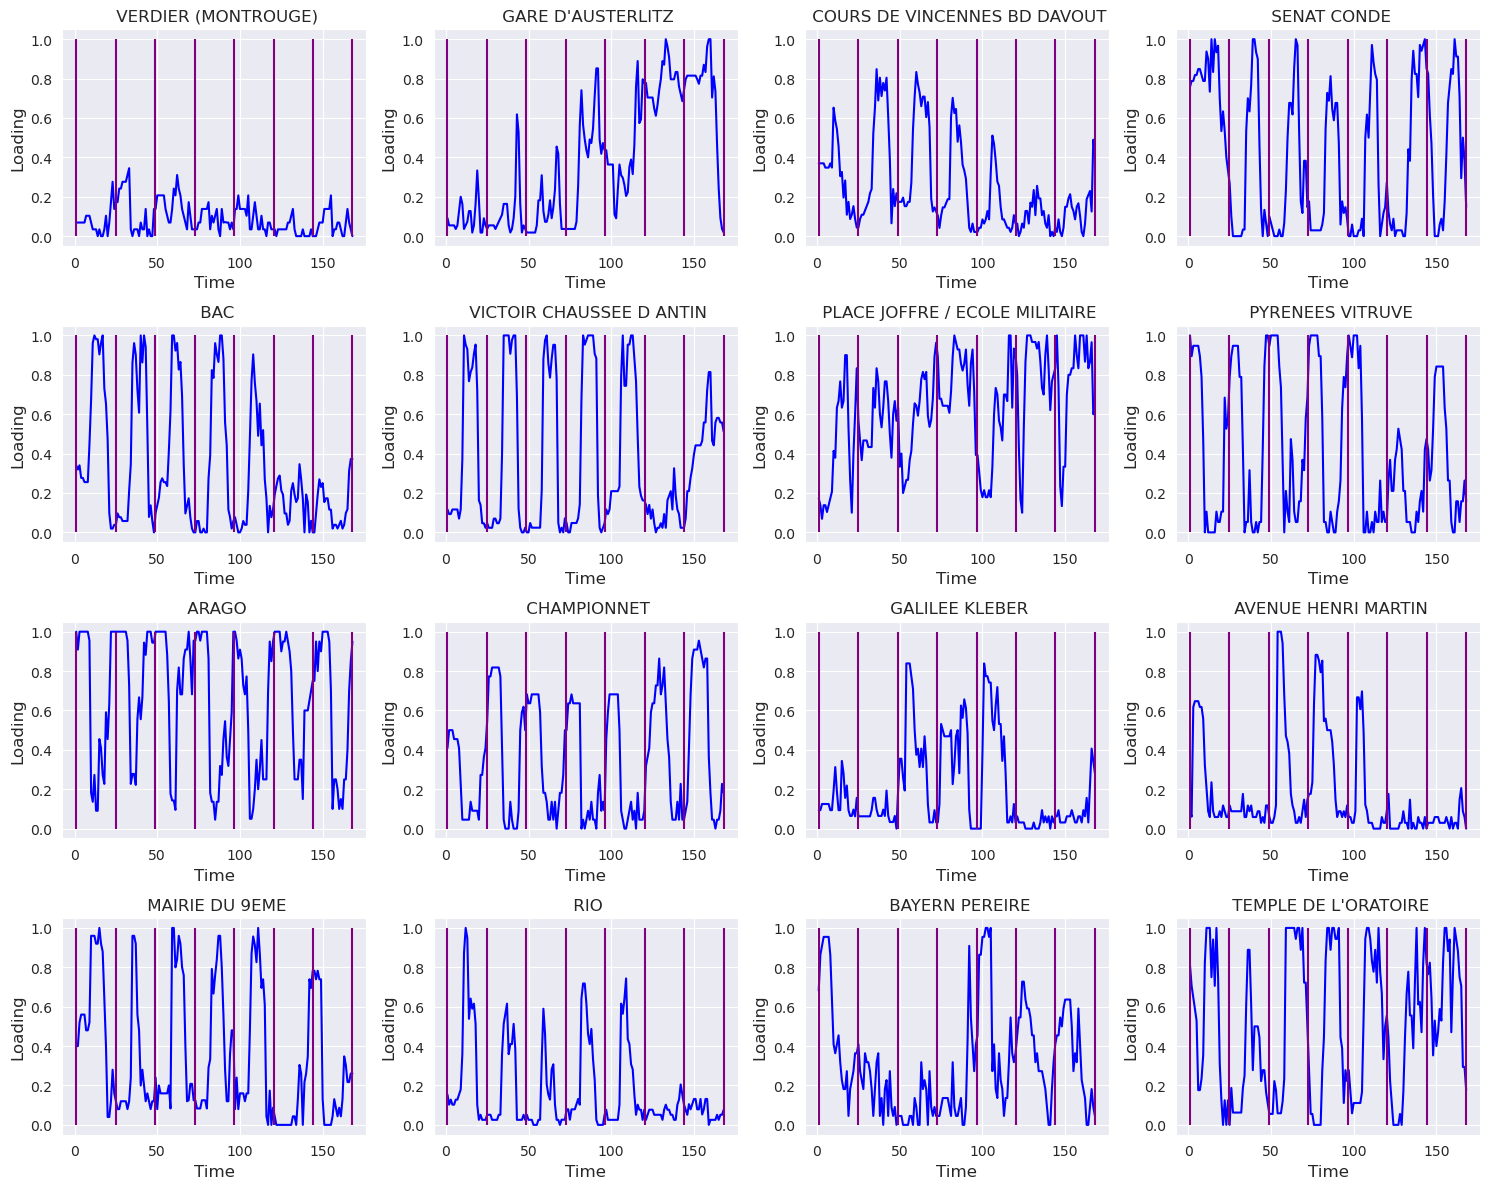

In [9]:
# On prend 16 stations au hasard
loading_data = loading.to_numpy() 

n_steps    = loading.shape[1]  # nombre de pas de temps observés
time_range = np.linspace(1, n_steps, n_steps)  # intervalle de temps observé
time_tick  = np.linspace(1, n_steps, 8)  # début de chaque jour


stations = np.arange(loading.shape[0])
rd.shuffle(stations)
stations = stations[:16] 


fig, axs = plt.subplots(4, 4, figsize = (15,12))

for i in range(4):
    for j in range(4):
        k_station = stations[4 * i + j] # on parcourt les 16 premiers éléments de la liste (de 0 à 15)
        axs[i, j].plot(time_range, loading_data[k_station, :], color = 'blue')
        axs[i, j].vlines(x = time_tick, ymin = 0, ymax = 1, colors = "purple")
        axs[i, j].set_title(coord.names[1 + k_station], fontsize = 12)

for ax in axs.flat:
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Loading', fontsize = 12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
plt.tight_layout()
plt.show()

Interprétation : 

On observe une série de graphiques qui représentent le niveau de chargement des stations de Vélib à Paris sur une période de temps d'une semaine, avec des intervalles de temps horaires sur l'axe des abscisses (Time) et le niveau de chargement sur l'axe des ordonnées (Loading).

* Variations temporelles : Chaque graphique montre les variations dans la semaine du nombre de vélos disponibles dans chaque station, parmis 16 prises au hasard. Les pics à 1 indiquent que tous les vélos sont disponibles à ce moment-là. On observe les périodes de la journée où les vélos sont les plus utilisés (les creux dans les graphiques), cela poueeait correspondre aux déplacements pendulaires pour se rendre sur les lieux de travail. On remarque une temporalité dans certaines stations, avec des taux de chargements similaires sur les 5 premiers jours de la semaine, et des différences au niveau des chargements les week-ends. Les pics correspondes aux périodes où les vélos sont les moins disponibles, c'est à dire les moments où les taux de chargements des stations Vélib sont les plus grands.

* Comparaison entre les stations : En comparant les graphiques entre eux, on peut identifier les stations qui ont un taux de rotation élevé des vélos (grand nombre de variations entre des valeurs élevées et basses) et celles qui sont moins utilisées (moins de variation ou des niveaux plus constants).

### Etude du chargement médian des stations

Avec les courbes précédentes, nous avons pu constater des variations importantes entre les stations. Malgré cela, on retrouve une similarité commune sur la temporalité et les similarités observées sur certains jours. Nous allons étudier le chargement médian des stations pour étudier cette temporalité. Le plus pertinent est ici d'afficher une superposition de boxplots, afin d'étudier la valeur médiane, ainsi que les valeurs des quantiles, en fonction des heures tout au long de la semaine. 

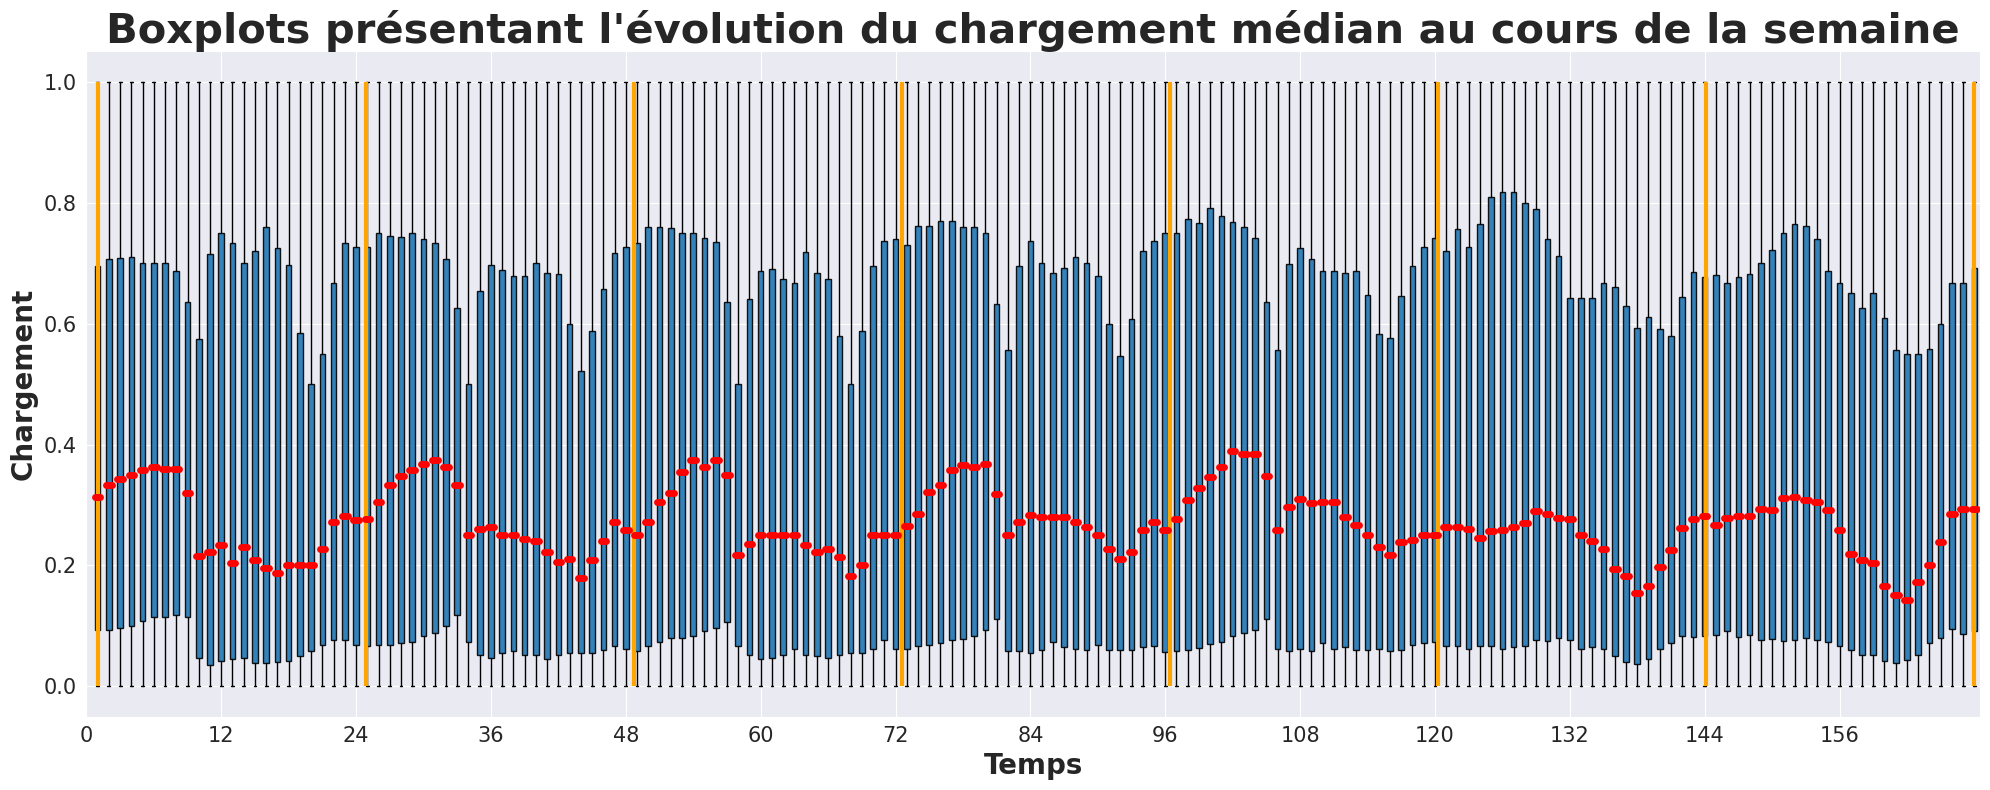

In [10]:
plt.figure(figsize=(20,8))

bp = plt.boxplot(loading_data,patch_artist = True)
    
for box in bp['boxes']:
    box.set_alpha(0.9) #To make it transparent
    
for median in bp['medians']:
    median.set(color = "red", linewidth=5)
    
plt.vlines(x = time_tick, ymin = 0, ymax = 1, colors = "Orange", linewidth = 3) 
# time_tick, déjà défini et correspond aux jours

plt.xlabel('Temps', fontsize = 20, fontweight='demibold')
plt.ylabel('Chargement', fontsize = 20, fontweight='demibold')
plt.title("Boxplots présentant l'évolution du chargement médian au cours de la semaine", fontsize = 30, fontweight='bold')
plt.xticks(ticks = np.arange(0, 168, 12), labels=np.arange(0, 168, 12), fontsize = 15)
plt.yticks(fontsize = 15)


plt.tight_layout()
plt.show()

Interprétation : 

Ce graphique présente une superposition de boxplots montrant l'évolution du chargement des stations vélib au cours du temps horaire sur une semaine. 

* Série temporelle : La ligne rouge représente la médiane du chargement des stations au fil du temps. Elle montre comment le niveau de chargement change. Ainsi, on peut identifier un modèle cyclique sur les 5 premiers jours de la semaine, qui pourrait correspondre aux déplacements pendulaires pour se rendre sur les lieux de travail. Ainsi, on voit une forte diminution du taux de chargement tous les matins du lundi au vendredi à la même heure et de la même amplitude sur le boxplot. Puis, le taux de chargement remonte progressivement dans la journée, de manière similaire sur les jours ouvrés. Pour le week-end, on remarque une différence avec une forte atténuation de cet effet pendulaire. Le taux de chargement est plus constant au cours de la journée, avec une forte diminution correspondant à une plus forte utilisation des vélos en fin de journée sur le samedi et dimanche. 

* Amplitude des valeurs : On observe un écart très important entre le premier et le troisième quartile, ce qui traduit une grande variation du taux de chargement entre les stations. De plus, la valeur du premier quartile augmente fortement au cours de la matinée. Cela traduit le fait que beaucoup de stations se déchargent sur cette période. Cela se remarque aussi avec les pics bi-pendulaires observés sur le troisème quartile. En effet, on remarque deux pics bien plus bas que sur les box-plots des autres horaires. Ces pics correspondents aux moments de la journée où les vélos sont les plus utilisés : la valeur du troisième quartile diminue nettement. 

### Etude de la temporalité du chargement moyen au cours de la semaine

Nous avons émis des conjectures sur la similarité de l'évolution des taux de chargement sur less jours de travail, ainsi qu'une différence observée au niveau des week-ends. Nous souhaitons vérifier cette hypothèse. Pour ce faire, nous allons calculer le chargement moyen des sttions sur chaque heure d'une journée, puis comparer l'évolution de cette moyenne en fonction des jours de la semaine. Il est pertinent d'afficher l'évolution de la moyenne sur l'ensemble des jours de la semaine pour étudier la tendance suivie.

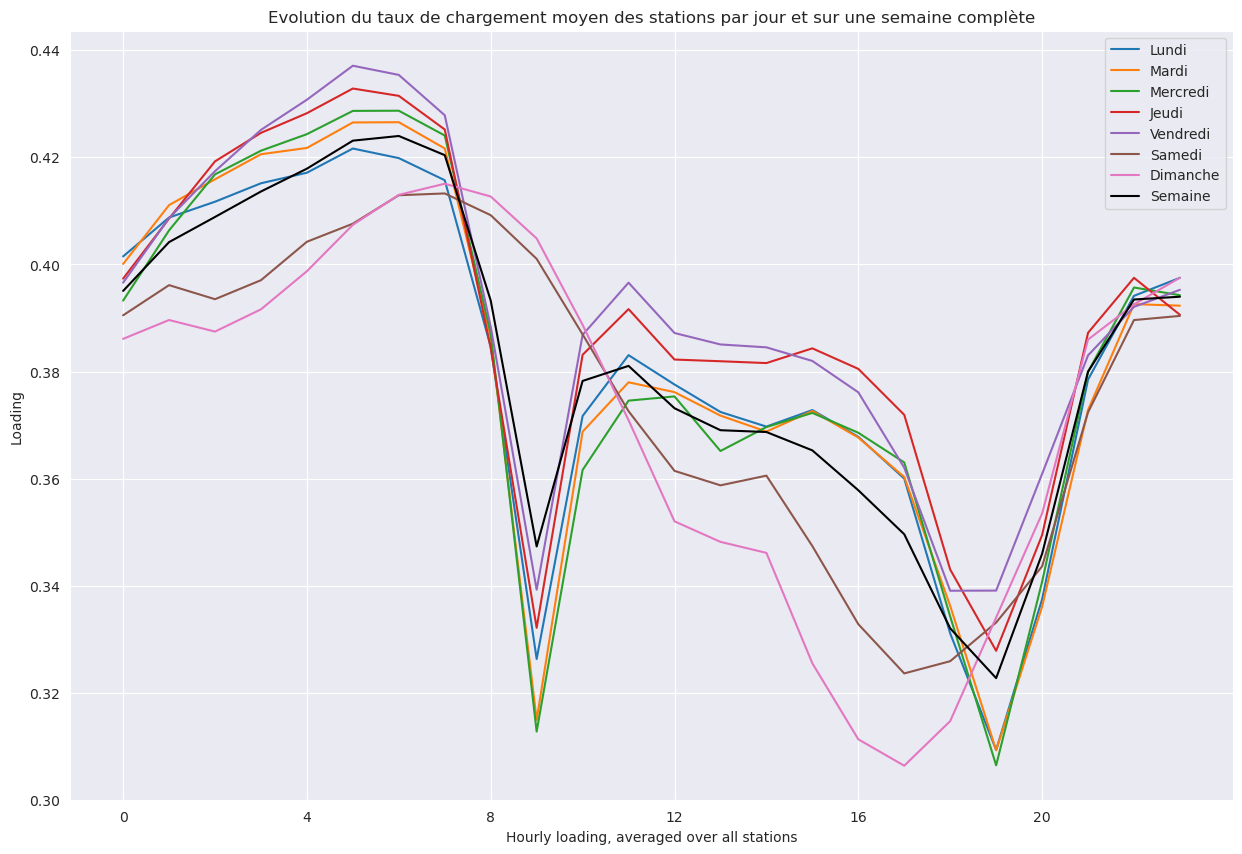

In [11]:
mean_per_hour_per_day = loading.mean(axis = 0).to_numpy()
mean_per_hour_per_day = mean_per_hour_per_day.reshape((7, 24)) # 7 jours et 24 heures

mean_per_hour = mean_per_hour_per_day.mean(axis=0)

days = ["Lundi", "Mardi", "Mercredi","Jeudi", "Vendredi", "Samedi", "Dimanche"]
plt.figure(figsize = (15,10))

plt.plot(mean_per_hour_per_day.transpose())
plt.plot(mean_per_hour, color = "black")

plt.xlabel('Hourly loading, averaged over all stations')
plt.ylabel('Loading')
plt.legend(days + ['Semaine'])
plt.xticks(ticks = np.arange(0,24,4), labels=np.arange(0,24,4))
plt.title("Evolution du taux de chargement moyen des stations par jour et sur une semaine complète")
  
plt.tight_layout
plt.show()

Interprétation : 

Tout d'abord, on peut visualiser des variations quotidiennes. Chaque ligne colorée représente un jour différent de la semaine, et la ligne noire représente la moyenne sur toute la semaine. On peut observer les tendances de chargement des stations pour chaque jour travaillé. On confirme également que le taux de chargement est différent pendant les week-ends, avec néanmoins une similarité observée entre le samedi et le dimanche. De plus, la moyenne hebdomadaire suit la tendance des jours travaillés. 

On remarque aussi des pics et des creux. Les pics représentent les heures où les stations sont les plus chargées en moyenne, ce qui pourrait correspondre aux heures avant que les gens ne se rendent au travail ou à l'école. Les creux représentent les heures où les stations sont les moins chargées, ce qui pourrait correspondre aux heures de pointe où les vélos sont utilisés pour les trajets. Cela va dans le même sens que nos hypothèses sur les boxplots superposés.

On peut en déduire des habitudes dans les comportements des utilisateurs. Par exemple, si les stations sont moins chargées vers 8h et 18h, cela pourrait indiquer les heures de début et de fin de journée de travail typiques.

En examinant les différences entre les jours de la semaine, on peut identifier des tendances spécifiques, comme des jours avec une plus grande utilisation des vélos. Par exemple, si les lignes pour le samedi et le dimanche montrent un chargement plus élevé pendant la journée, cela pourrait indiquer une utilisation récréative plus importante pendant les week-ends.


### Etude des stations vélib sur une carte 

Nous avons constaté des fortes disparités du taux de chargement en fonction des stations en affichant le pannel aléatoir de 16 sations de notre jeu de données. Nous nous demandons si cette disparité est due à l'emplacement géographique des stations. Par exemple, nous pouvons nous demander si le fait que certaines stations commencent la journée avec un taux de chargement faible pourraient être des stations se situant dans des quartiers de bureaux (généralement au centre, vers La Défense...), et se remplissent fortement dans la matinée. A contrario, certaines stations situées en périphérie pourraient commencer la journée avec un taux de remplissage élevé, puis se vider sur la période de départ au travail/école, et se remplir à nouveau en fin de journée. 

Pour étudier cela, nous allons étudier le taux de remplissage des staions sur une carte sur une même journée, à différents moments.

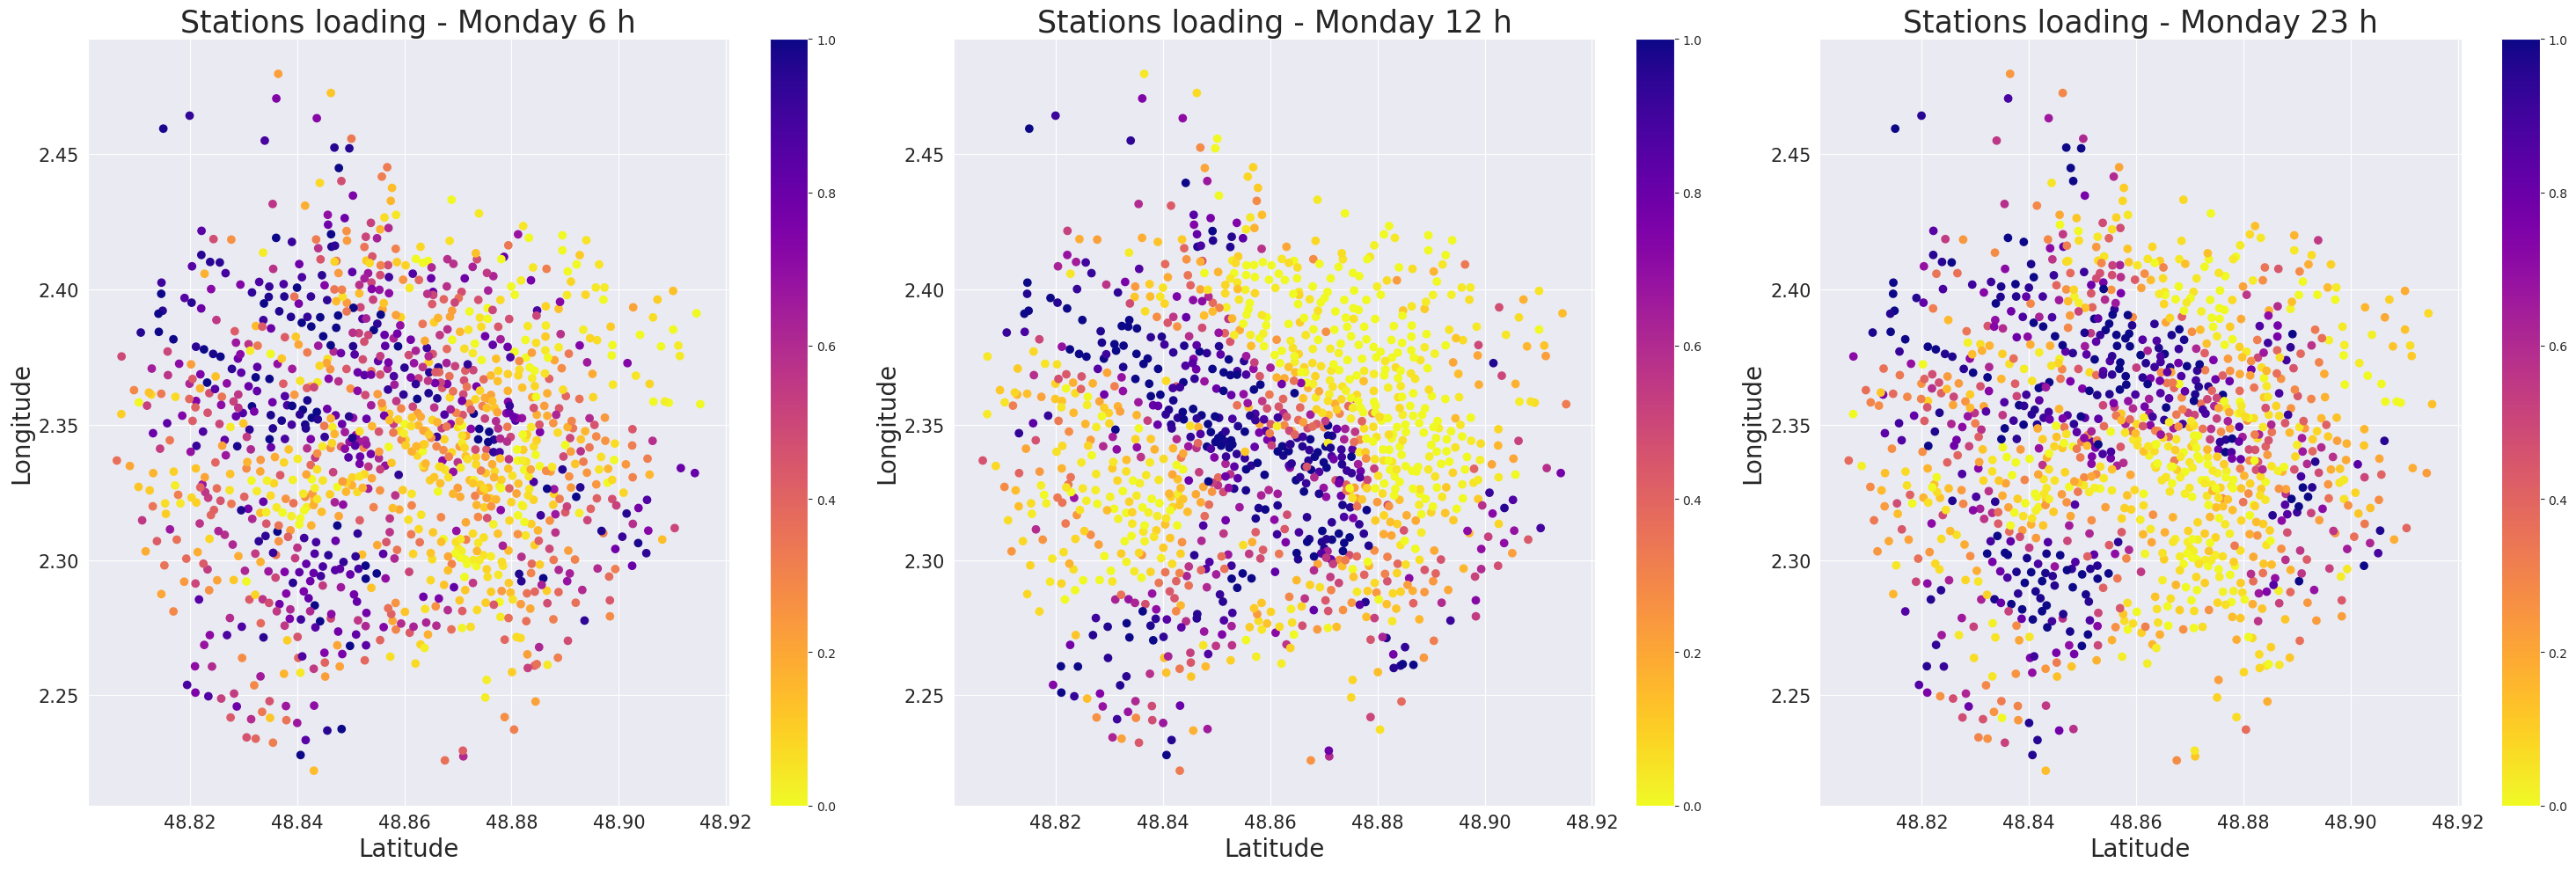

In [12]:
hours = [6, 12, 23] # les différents moments de la journée qu'on étudie.

s, n = 10, len(hours)
fig, axs = plt.subplots(1, n, figsize = (s*n, s))

for (i,h) in enumerate(hours):
    im = axs[i].scatter(coord.latitude, coord.longitude, c = loading_data[:,h], cmap = cm.plasma_r)
    axs[i].set_title('Stations loading - Monday {} h'.format(h), fontsize = 25)
    plt.colorbar(im, ax=axs[i])
        
for ax in axs.flat:
    ax.set_xlabel('Latitude', fontsize = 20)
    ax.set_ylabel('Longitude', fontsize = 20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

Interprétation : 

Les axes représentent la latitude et la longitude, positionnant ainsi les stations de Vélib sur une carte de Paris.
La couleur de chaque point représente le niveau de chargement de la station à l'heure indiquée, avec un code couleur allant du violet (peu ou pas de vélos disponibles) au jaune (station complètement chargée).

* Analyse à 6 heures (premier graphique à gauche) :

À 6 heures du matin, on observe une majorité de stations avec un chargement moyen à élevé (beaucoup de points jaunes et oranges). Cela suggère que les vélos ne sont pas encore largement utilisés à cette heure, ce qui est attendu tôt le matin. Et confirme l'hypothèse sur les stations en banlieu ou périphérie.

* Analyse à 12 heures (graphique du milieu) :

À midi, les couleurs sont peu variées. En effet, les stations sont soit assez pleines, soit assez vides. Il n'y a pas vraiment de station avec un taux de chargement moyen. De plus, on observe un regroupement central des stations présentant de la disponibilité. Ce regroupement peut correspondre aux quartiers de bureaux. 

* Analyse à 23 heures (dernier graphique à droite) :

À 23 heures, on observe une situation qui se rapproche de celle du même jour à 6h du matin. La répartition est plus homogène et les stations sont globalement chargées, les vélos sont disponibles, il y compris en périphérie.Cela pourrait indiquer que les gens ont tendance à moins utiliser les vélos en fin de soirée, qu'ils sont rentrés dans des quartiers résidentiels, ou que les vélos ont été retournés aux stations après les déplacements de la journée.


Ces cartes de chaleur peuvent également aider les gestionnaires de Vélib à identifier les zones où il y a une demande élevée de vélos à certaines heures, et où un rééquilibrage pourrait être nécessaire pour s'assurer que les utilisateurs trouvent des vélos disponibles en fonction de l'heure.

Finalement, cette analyse concorde avec nos hypothèses sur les taux de remplissages en fonction des types de quartiers (résidentiels ou de bureaux). 

### Etude des déplacements pendulaires sur une carte

Pour mettre en lumière les déplacements pendulaires, et ainsi confirmer ou invalider nos hypothèses, nous allons représenter ce même style de graphique avant les déplacements pendulaires (par exmple le matin assez tôt), et après (par exemple en milieu de matinée).

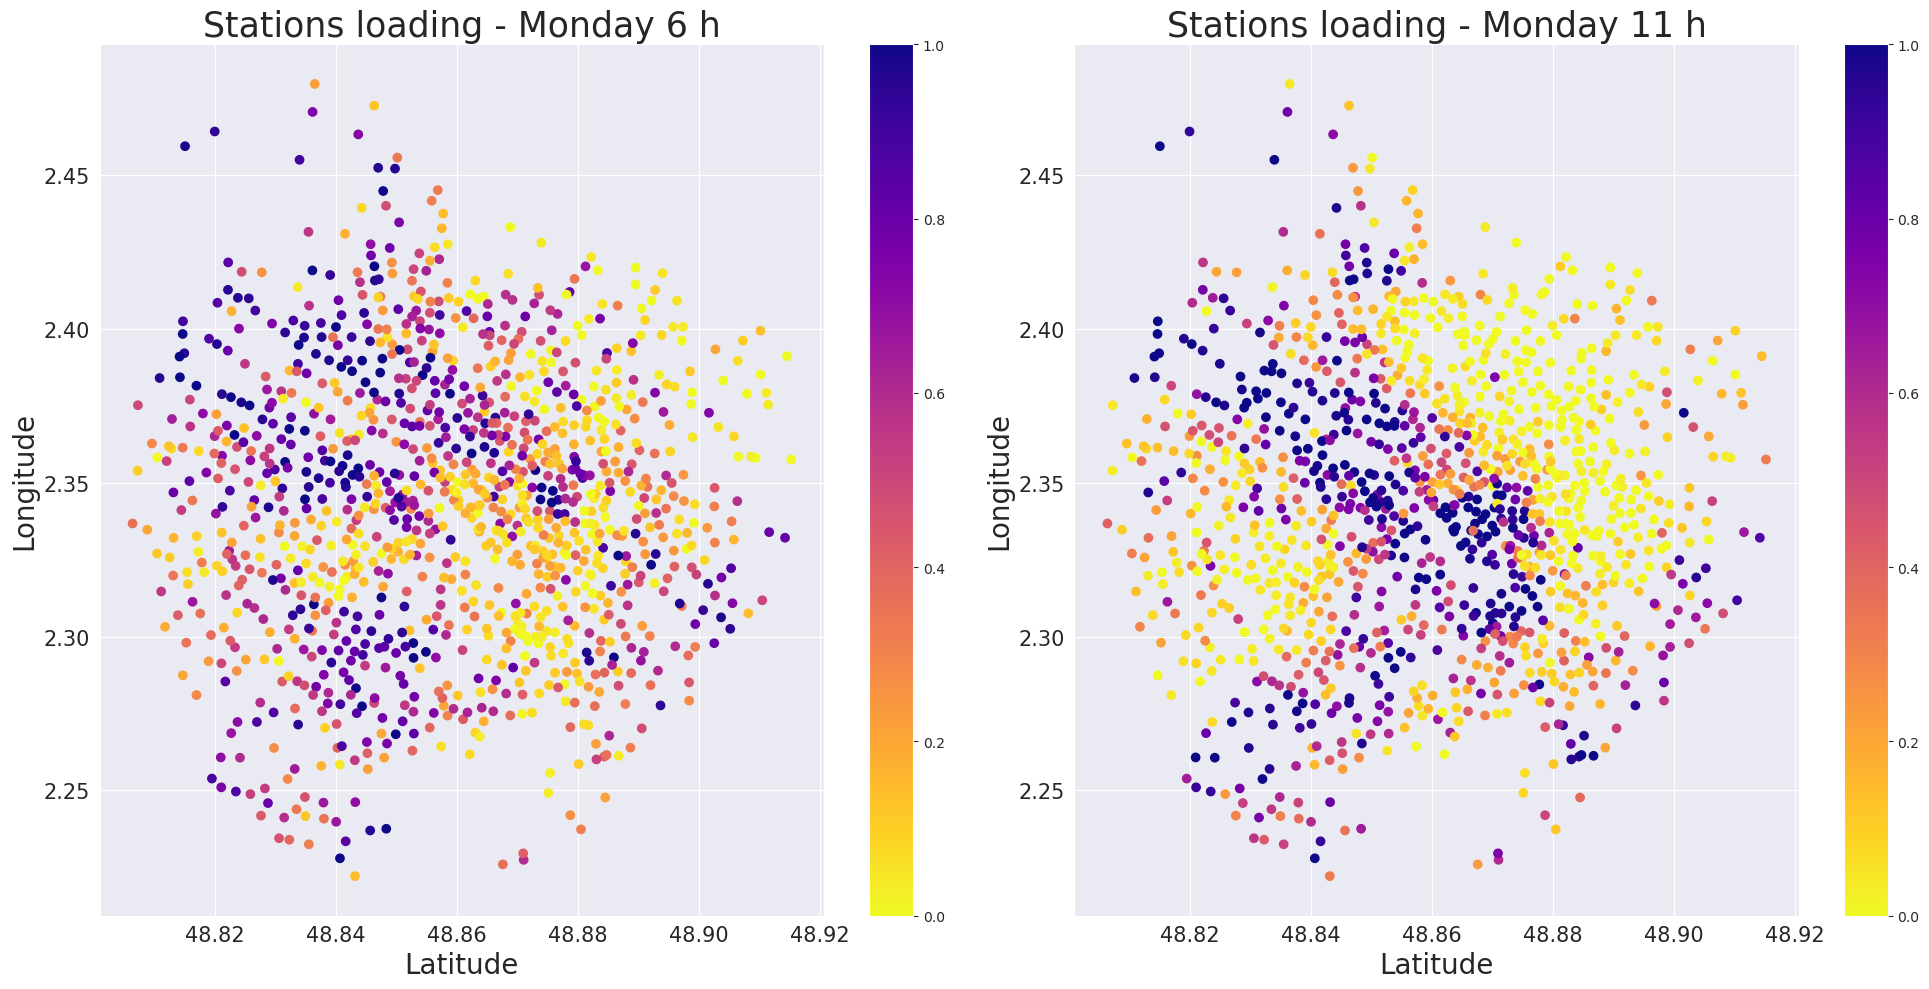

In [13]:
hours = [6, 11] # les différents moments de la journée qu'on étudie.

s, n = 10, len(hours)
fig, axs = plt.subplots(1, n, figsize = (s*n, s))

for (i,h) in enumerate(hours):
    im = axs[i].scatter(coord.latitude, coord.longitude, c = loading_data[:,h], cmap = cm.plasma_r)
    axs[i].set_title('Stations loading - Monday {} h'.format(h), fontsize = 25)
    plt.colorbar(im, ax=axs[i])
        
for ax in axs.flat:
    ax.set_xlabel('Latitude', fontsize = 20)
    ax.set_ylabel('Longitude', fontsize = 20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

Interprétation : 

Sur cette carte, nous observons clairement que les stations en périphérie se vident au profit des stations au centre. De plus, puisque les tendances observées sur tous les jours travaillés sont les mêmes (cf : Etude de la temporalité du chargement moyen au cours de la semaine), on peut alors valider notre hypothèse selon laquelle les déplacements pendulaires font que les vélos sont utilisés de l'extérieur de la ville vers le centre, où sont regroupés les quartiers de bureaux. 

### Influence de l'altitude des stations sur les taux de chargement

Nous avons présenté la colonne bonus dans l'introduction de ce projet. Nous allons regarder si cet élément à une influence sur le taux de chargement des stations. Pour ce faire, nous allons commencer par étudier la répartition des stations en altitude.

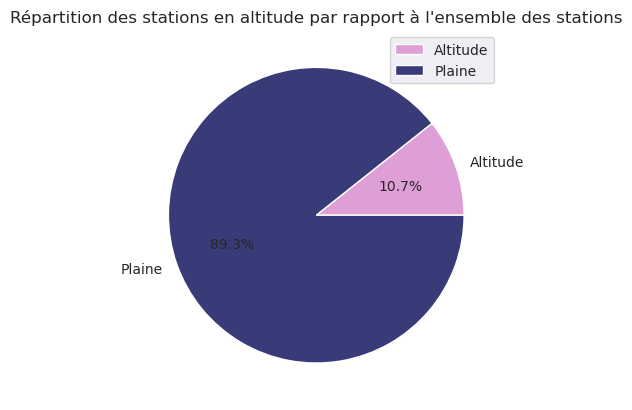

In [14]:
loading_hill   = loading_data[coord.bonus == 1]
loading_valley = loading_data[coord.bonus == 0]

size = [len(loading_hill), len(loading_valley)]
labels = ['Altitude', 'Plaine']

plt.pie(size, labels = labels, autopct="%1.1f%%", 
        colors = [sns.color_palette('tab20b')[-1],sns.color_palette('tab20b')[0]])

plt.legend()
plt.title("Répartition des stations en altitude par rapport à l'ensemble des stations")
plt.show()

Interprétation : 

La grande majorité des stations Vélib, soit 89.3%, sont situées en plaine. Cela suggère que la plupart des stations sont dans des zones relativement plates de la ville. Seulement 10.7% des stations sont situées en altitude. Ces stations peuvent se trouver sur des collines ou dans des zones élevées de la ville.

Cette répartition peut avoir des implications sur l'usage des vélos. Les stations en plaine sont probablement plus fréquentées en raison de la facilité de pédalage sur terrain plat. Les stations en altitude pourraient avoir moins de fréquentation en raison de l'effort supplémentaire requis pour y accéder ou en partir, bien qu'elles puissent servir des zones résidentielles situées en hauteur.

Cela peut avoir un impact sur des opérations logistiques. Il peut y avoir des opérations de rééquilibrage des vélos (s'assurer que les stations ne soient ni vides ni pleines). Il peut être plus difficile de maintenir un bon équilibre pour les stations en altitude, en particulier si les utilisateurs ont tendance à prendre les vélos en descente et non en montée.

### Représentation des stations en altitude sur une carte

1106Nous allons étudier la répartition géographique des stations en altitude. De manière analogue aux première visualisations sur cartes, nous allons représenter la répartition des stations en altitude sous forme de nuage de points. En s'appuyant sur nos observations précédentes, nous allons voir si cet élément peut avoir une influence sur les chargements des stations.

Nous allons également juxtaposer la carte montrant le taux de chargement à 6h du matin pour comparer avec le taux de chargement des stations.

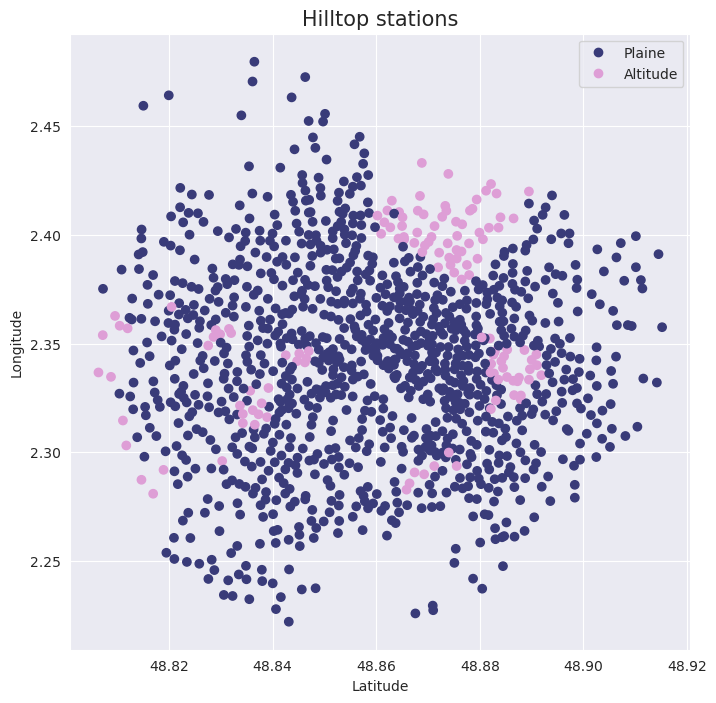

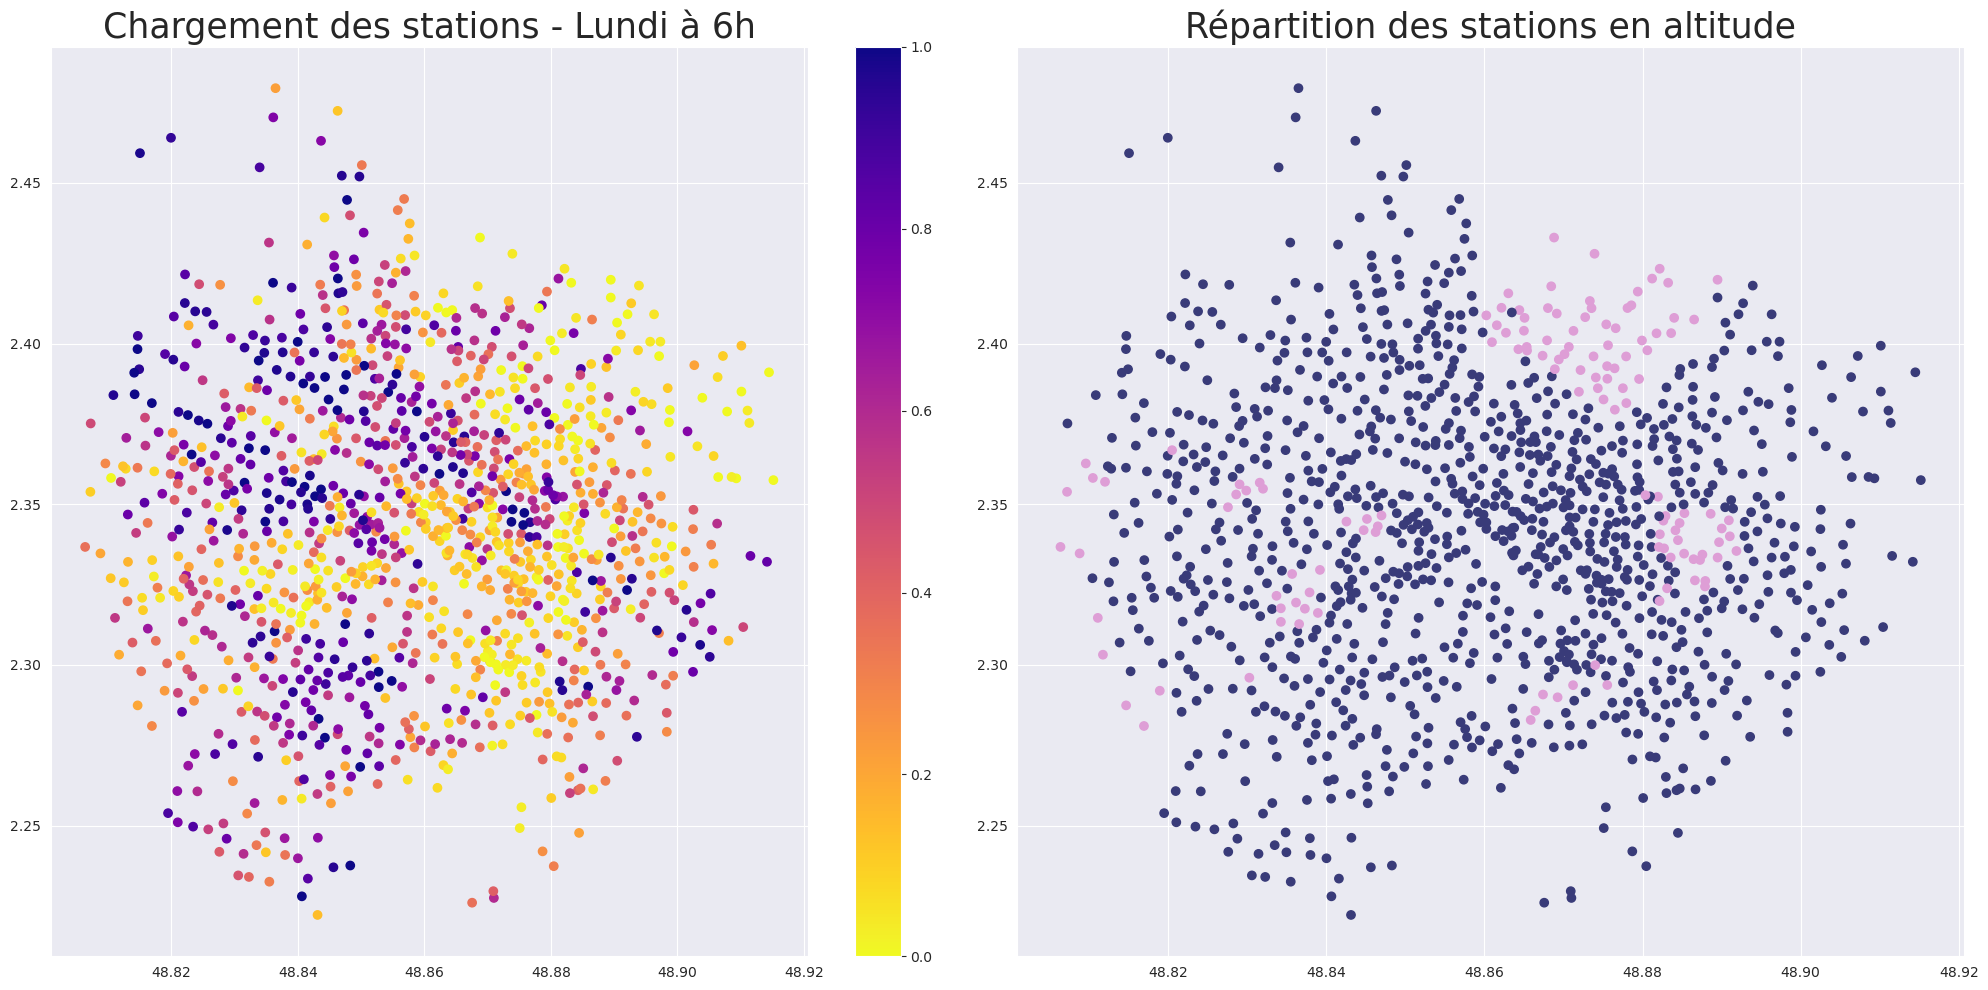

In [15]:
plt.figure(figsize = (8, 8))

sctrplt = plt.scatter(coord['latitude'], coord['longitude'], 
                      c = coord['bonus'], cmap = sns.color_palette('tab20b', as_cmap=True))

plt.xlabel('Latitude', fontsize = 10)
plt.ylabel('Longitude', fontsize = 10)
plt.title('Hilltop stations', fontsize = 15)
plt.legend(handles = sctrplt.legend_elements()[0], labels = ["Plaine", "Altitude"], fontsize = 10)

plt.show()


hours = [6] 

s = 10
n = len(hours) +1
fig, axs = plt.subplots(1, n, figsize = (s*n, s))

im = axs[0].scatter(coord.latitude, coord.longitude, c = loading_data[:,hours], cmap = cm.plasma_r)
axs[0].set_title('Chargement des stations - Lundi à 6h'.format(hours), fontsize = 25)
plt.colorbar(im, ax=axs[0])
        
im = axs[1].scatter(coord['latitude'], coord['longitude'], 
                      c = coord['bonus'], cmap = sns.color_palette('tab20b', as_cmap=True))
axs[1].set_title('Répartition des stations en altitude'.format(hours), fontsize = 25)


plt.tight_layout()
plt.show()

Interprétation : 

* Distribution géographique :

Les stations situées en plaine sont largement réparties sur toute la carte, indiquant une bonne couverture de ces zones par le réseau Vélib. Les stations en altitude sont moins nombreuses et semblent être groupées dans certaines zones, ce qui est cohérent avec le diagramme en camembert précédent indiquant que seulement 10,7 % des stations sont en altitude.

* Accessibilité et préférences d'utilisation :

Comme les stations en plaine sont plus nombreuses et probablement plus accessibles, elles sont susceptibles d'être plus utilisées, comme nous l'avons discuté précédemment. Cela pourrait être dû à la facilité de pédaler sur un terrain plat.
Les stations en altitude peuvent avoir des taux d'utilisation plus faibles, notamment parce que les efforts nécessaires pour atteindre ces stations sont plus importants, ce qui peut dissuader leur utilisation, surtout lorsqu'il s'agit de remonter.

* Implications pour la planification urbaine :

L'emplacement des stations en altitude peut nécessiter une attention particulière de la part des planificateurs urbains et des gestionnaires de Vélib pour garantir une distribution équilibrée des vélos et pour encourager leur utilisation, peut-être en offrant des incitations. Cependant, en juxtaposnt les deux cartes comme dans la deuxième partie du graphique, on remarque que les stations en altitudes ont un faible taux de remplissage le matin à 6h. On en déduit que les vélos ne sont pas nécéssairement remontés dans ces stations, peut être parce qu'ils ne sont pas beaucoup demandé. Cela va dans le sens du caractère plus sportif de leur accessibilité. 

* Corrélation avec la topographie :

La concentration des stations en altitude dans des zones spécifiques peut correspondre à la topographie de Paris, avec des collines comme Montmartre ou Belleville. Cela montre que le réseau Vélib tient compte du relief de la ville dans la planification de l'emplacement des stations.

## Conclusion sur l'étude descriptive

L'étude statistique a fourni des perspectives significatives sur la dynamique d'utilisation des stations Vélib à Paris. Nous avons examiné plusieurs aspects, notamment la disponibilité des vélos à différentes heures de la journée et des jours de la semaine, la distribution géographique des stations par rapport à la topographie de la ville et la répartition des stations entre les zones de plaine et les zones en altitude.

Les graphiques temporels ont montré des modèles d'utilisation distincts au cours de la journée, avec des pics de disponibilité des vélos tôt le matin et tard le soir, et une diminution pendant les heures de pointe. Ces tendances sont probablement liées aux habitudes de déplacement des parisiens, avec un usage plus intense lors des trajets pendulaires et une utilisation moindre durant les heures creuses.

La répartition spatiale des stations de Vélib a révélé que la majorité des stations sont situées en plaine, facilitant l'accès et l'utilisation. En revanche, une minorité de stations situées en altitude pourrait indiquer des défis spécifiques, tels que des efforts supplémentaires pour atteindre ces stations, pouvant expliquer une utilisation moins fréquente.

Nous allons maintenant étudier les possibilités de réduction de dimension de nos jeux de données.

# II - Réduction de dimension par ACP (Analyse en Composantes Principales)

Dans cette partie, nous allons procéder à une Analyse en Composantes Principales (ACP). L'objectif de cette méthode est de synthétiser les variables du jeu de donbnées initial en un nombre limité de composantes principales, tout en conservant un maximun d'informations. Initialement, nous avons 168 variables, qui correspondent aux 168 heures d'une semaine. Nous allons étudier s'il est possible de réduire cette dimension, tout en conservant un maximum d'information. 

## Vérification du format des données

In [16]:
from sklearn.decomposition import PCA

In [17]:
print(loading.dtypes)
loading.head()

Lun-00    float64
Lun-01    float64
Lun-02    float64
Lun-03    float64
Lun-04    float64
           ...   
Dim-19    float64
Dim-20    float64
Dim-21    float64
Dim-22    float64
Dim-23    float64
Length: 168, dtype: object


Lun-00    Lun-01    Lun-02    Lun-03    Lun-04    Lun-05    Lun-06  \
1  0.038462  0.038462  0.076923  0.038462  0.038462  0.038462  0.038462   
2  0.478261  0.478261  0.478261  0.434783  0.434783  0.434783  0.434783   
3  0.218182  0.145455  0.127273  0.109091  0.109091  0.109091  0.090909   
4  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381   
5  0.927536  0.811594  0.739130  0.724638  0.724638  0.724638  0.724638   

     Lun-07    Lun-08    Lun-09  ...    Dim-14    Dim-15    Dim-16    Dim-17  \
1  0.038462  0.107143  0.000000  ...  0.296296  0.111111  0.111111  0.148148   
2  0.434783  0.260870  0.043478  ...  0.043478  0.000000  0.217391  0.130435   
3  0.090909  0.054545  0.109091  ...  0.259259  0.259259  0.203704  0.129630   
4  1.000000  1.000000  1.000000  ...  1.000000  1.000000  0.904762  0.857143   
5  0.724638  0.753623  0.971014  ...  0.227273  0.454545  0.590909  0.833333   

     Dim-18    Dim-19    Dim-20    Dim-21    Dim-22    Dim-23  
1  0.307692  0.076923  0.115385  0.076923  0.153846  0.153846  
2  0.045455  0.173913  0.173913  0.173913  0.260870  0.391304  
3  0.148148  0.296296  0.314815  0.370370  0.370370  0.407407  
4  0.857143  0.857143  0.761905  0.761905  0.761905  0.761905  
5  1.000000  0.818182  0.636364  0.712121  0.621212  0.575758  

[5 rows x 168 columns]

Interprétation : 

Notre dataframe sur le chargement contient uniquement des valeurs quantitatives (il est donc compatible pour une ACP). 

## Mise en place de l'ACP

Nous commençons par réaliser une ACP pour réduire nos données de 168 à 20 dimensions. Nous allons observer les poucentages de variances expliquées et le pourcentage de variance cumulée.

In [18]:
pca = PCA(20)  # projection from 168 to 20 dimensions
projected = pca.fit_transform(loading)

eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x+1) for x in range(20)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

Dimension  Variance expliquée  % variance expliquée  % cum. var. expliquée
0       Dim1            7.979795                  40.0                   40.0
1       Dim2            4.813008                  24.0                   64.0
2       Dim3            1.022402                   5.0                   69.0
3       Dim4            0.858160                   4.0                   74.0
4       Dim5            0.624146                   3.0                   77.0
5       Dim6            0.374261                   2.0                   79.0
6       Dim7            0.328344                   2.0                   80.0
7       Dim8            0.313669                   2.0                   82.0
8       Dim9            0.250936                   1.0                   83.0
9      Dim10            0.228589                   1.0                   84.0
10     Dim11            0.196885                   1.0                   85.0
11     Dim12            0.169876                   1.0                   86.0
12     Dim13            0.161587                   1.0                   87.0
13     Dim14            0.142008                   1.0                   88.0
14     Dim15            0.140298                   1.0                   88.0
15     Dim16            0.130224                   1.0                   89.0
16     Dim17            0.123711                   1.0                   90.0
17     Dim18            0.107225                   1.0                   90.0
18     Dim19            0.099942                   1.0                   91.0
19     Dim20            0.077001                   0.0                   91.0

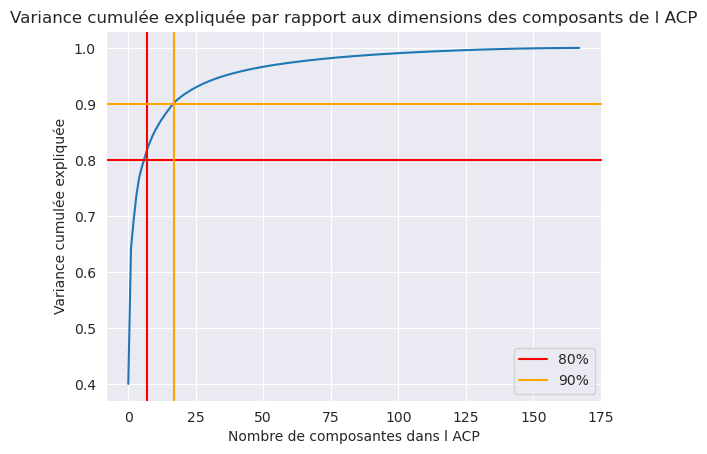

In [19]:
pca = PCA().fit(loading)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.8,color='red', label='80%')
plt.axvline(x=7,color='red')

plt.axhline(y=0.9,color='orange', label='90%')
plt.axvline(x=17,color='orange')
plt.title('Variance cumulée expliquée par rapport aux dimensions des composants de l ACP')
plt.xlabel('Nombre de composantes dans l ACP')
plt.ylabel('Variance cumulée expliquée') 
plt.legend()
plt.show()

Interprétation : 
* Dans un premier temps, le tableau nous présente la varianxce expliquée pour chaque dimension, ainsi que le pourcentage que cela représente. La dernière colonne nous donne les pourcentages de variances cumulées. En général, on peut se satisfaire de dimension représentant 80% de la variance cumulée. Ici, cela reviendrait à garder 7 composantes principales. Si on souhaite plus de précision, avec 90% de la variance cumulée, on peut alors garder 17 composantes principales. Cependant, on observe que les 2 premières composantes portent beaucoup d'information (65% de la variance cumulée), cela montre que ces 2 composantes portent à elles-seules beaucoup d'information. 

* Le graphique nous permet de vérifier ces observations. On remarque qu'à partir d'un certain seuil (environ 90%), il faut rajouter beaucoup de composantes dans l'ACP pour gagner de l'information sur la variance cumulée.

## Etude des composantes principales

Nous allons construire un nouveau dataframe avec les 7 premiers composantes de l'ACP. Comme présenté ci-dessus, cela nous permeter d'expliquer 80% de la variance. 

In [20]:
# Transformation en DataFrame des résultats de l'ACP
loading_pca = pd.DataFrame({
    "Dim1" : projected[:,0], 
    "Dim2" : projected[:,1],
    "Dim3" : projected[:,2],
    "Dim4" : projected[:,3],
    "Dim5" : projected[:,4],
    "Dim6" : projected[:,5],
    "Dim7" : projected[:,6],
   
})

# Résultat (premières lignes)
loading_pca.head()

Dim1      Dim2      Dim3      Dim4      Dim5      Dim6      Dim7
0 -0.898351 -2.323003  0.458664  1.478543 -0.898677  0.064373  0.196039
1  2.549737 -3.931784  0.242345  1.073338 -0.461774  0.457602 -0.777307
2  1.051734  1.056763  0.857191  0.939231 -0.981844 -0.143440 -0.610652
3 -0.083203  3.523981 -0.585202 -2.053468  1.582905 -0.248191  0.980502
4  1.381803  2.717041 -0.639688  0.940387  0.599746  1.077022 -0.194905

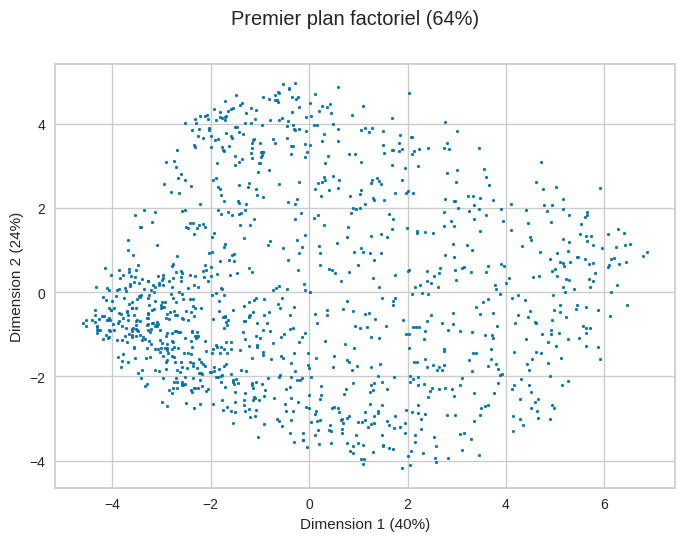

In [106]:
# Affichage de la répartition des données en fonction des 2 premières dimensions

loading_pca.plot.scatter("Dim1", "Dim2", s=4) # nuage de points
plt.xlabel("Dimension 1 (40%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (24%)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (64%)") # titre général
plt.show()



Interprétation : 

Il est maintenant possible de représenter les données sur le premier plan factoriel. Nous avons projeté le nuage des individus sur le premier plan factoriel, c’est-à-dire sur un plan composé des 2 premières composantes principales. Ici, on observe que : 

* Le premier axe (Dimension 1) explique 40% de la variance des données, et le deuxième axe (Dimension 2) en explique 24%. Ensemble, ils représentent 64% de la variance totale des données. Ceci indique que le premier plan factoriel donne une représentation assez informative des données, même si une part non négligeable de la variance reste non expliquée.
* Les points sont dispersés sur le graphe, ce qui suggère qu'il y a de la variabilité dans les données. Idéalement, pour une interprétation plus aisée, on aurait aimé voir des groupes de points distincts, ce qui indiquerait des clusters ou des regroupements naturels au sein des données.

Cependant, ce graphique n'est pas très pertienent et contient beaucoup d'informations supplémentaires qui ne peuvent pas êtres analysées correctement dans notre cas.  

* Bien que 64% ne soit pas un mauvais résultat, on pourrait espérer un pourcentage plus élevé pour une représentation fidèle des données.
* On remarque que les données sont uniformément dispersées et il n'y a pas de pattern visible de groupes ou de tendances. Cela peut indiquer que les deux principales composantes ne capturent pas bien les structures sous-jacentes.
    

## Mise en place d'hypothèses sur la signification des composantes principales

### Composante principale 1

On a choisi de conserver les 7 premières composantes principales de l'ACP afin de pouvoir expliquer 80% de la variance. Il est intéressant d'étudier la siagnification, ou ce que chacune des composantes principales pourrait représenter. 

Notre stratégie pour cette partie est la suivante : pour chaque composante principale conservée, nous récupérons les 5 indices des valeurs maximales pour cette composante, idemn pour les valeurs minimales. Suite à cela, nous utilisons ces indices pour récupérer et représenter l'évolution du taux de chargement moyen des stations correspondantes. A partir de nos observations dans cette étape nous émettons des conjectures sur la signification de chaque composante principale. Nous vérifierons nos hypothèses dans une partie ultérieure.

In [22]:
# On récupère les 5 valeurs min et max pour la première composante

max1 = loading_pca["Dim1"].nlargest(5).index
print("Indices des valeurs max")
print(max1)
print("---------")
min1 = loading_pca["Dim1"].nsmallest(5).index
print("Indices des valeurs min")
print(min1)

Indices des valeurs max
Int64Index([1106, 977, 440, 362, 402], dtype='int64')
---------
Indices des valeurs min
Int64Index([996, 84, 904, 1087, 1132], dtype='int64')


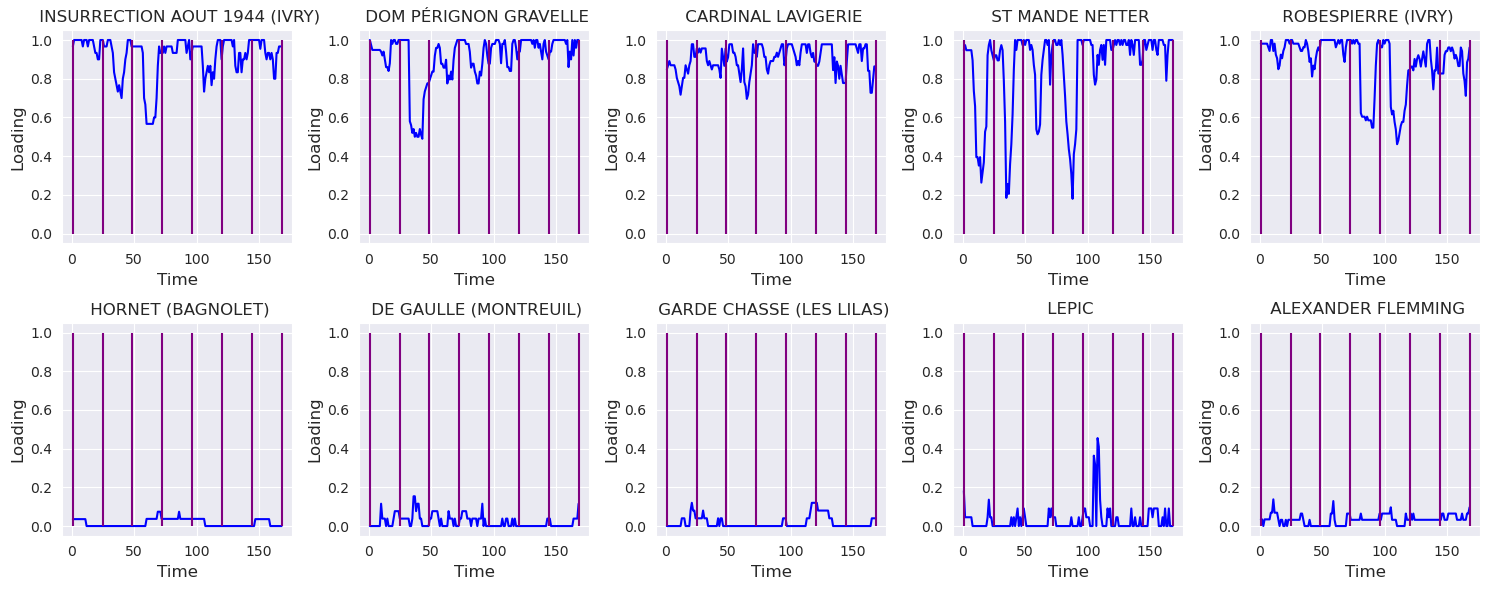

In [23]:
# On affiche l'évolution du chargement des stations correspondant aux indices que nous venons de récupérer

n_steps    = loading.shape[1]  # nombre de pas de temps observés
time_range = np.linspace(1, n_steps, n_steps)  # intervalle de temps observé
time_tick  = np.linspace(1, n_steps, 8)  # début de chaque jour


fig, axs = plt.subplots(2, 5, figsize = (15,6))

for j in range(5):
    k_station = max1[j] # on parcourt les 16 premiers éléments de la liste (de 0 à 15)
    axs[0, j].plot(time_range, loading_data[k_station, :], color = 'blue')
    axs[0, j].vlines(x = time_tick, ymin = 0, ymax = 1, colors = "purple")
    axs[0, j].set_title(coord.names[1 + k_station], fontsize = 12)
    
for j in range(5):
    k_station = min1[j] # on parcourt les 16 premiers éléments de la liste (de 0 à 15)
    axs[1, j].plot(time_range, loading_data[k_station, :], color = 'blue')
    axs[1, j].vlines(x = time_tick, ymin = 0, ymax = 1, colors = "purple")
    axs[1, j].set_title(coord.names[1 + k_station], fontsize = 12)

for ax in axs.flat:
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Loading', fontsize = 12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
plt.tight_layout()
plt.show()

Interprétation : 
   * Les 4 graphes situés sur la première rangée représentent les 4 stations avec les taux de chargement les plus élevés. ces graphes ont été construits en récupérant les 4 plus grandes valeurs de la dimension 1 de notre ACP. 
   * De même, les 4 graphes de la seconde ligne sont ceux où les stations sont les plus déchargées, c'est à dire lorsque les vélos d'une station sont très utilisés. On a obtenu ces graphes en récupérant les valeurs les plus petite de la dimension 1. 

On pourrait émettre l'hypothèse que la première dimension porte l'information sur le taux de chargement des stations. Plus la dimension 1 est élevée, plus le chargement est important. A l'inverse, plus la dimension 1 est faible et plus la station est vide. On pourrait vérifier cette hypothèse en calculant le chargement moyen et en étudiant la corrélation avec la dimension 1.

### Composante principale 2

Nous allons maintenant procéder à la même analyse pour la deuxième composante.

In [24]:
# On récupère les 5 valeurs min et max pour la deuxième composante

max2 = loading_pca["Dim2"].nlargest(5).index
print("Indices des valeurs max")
print(max2)
print("---------")
min2 = loading_pca["Dim2"].nsmallest(5).index
print("Indices des valeurs min")
print(min2)

Indices des valeurs max
Int64Index([1175, 474, 219, 628, 266], dtype='int64')
---------
Indices des valeurs min
Int64Index([1094, 570, 1180, 398, 353], dtype='int64')


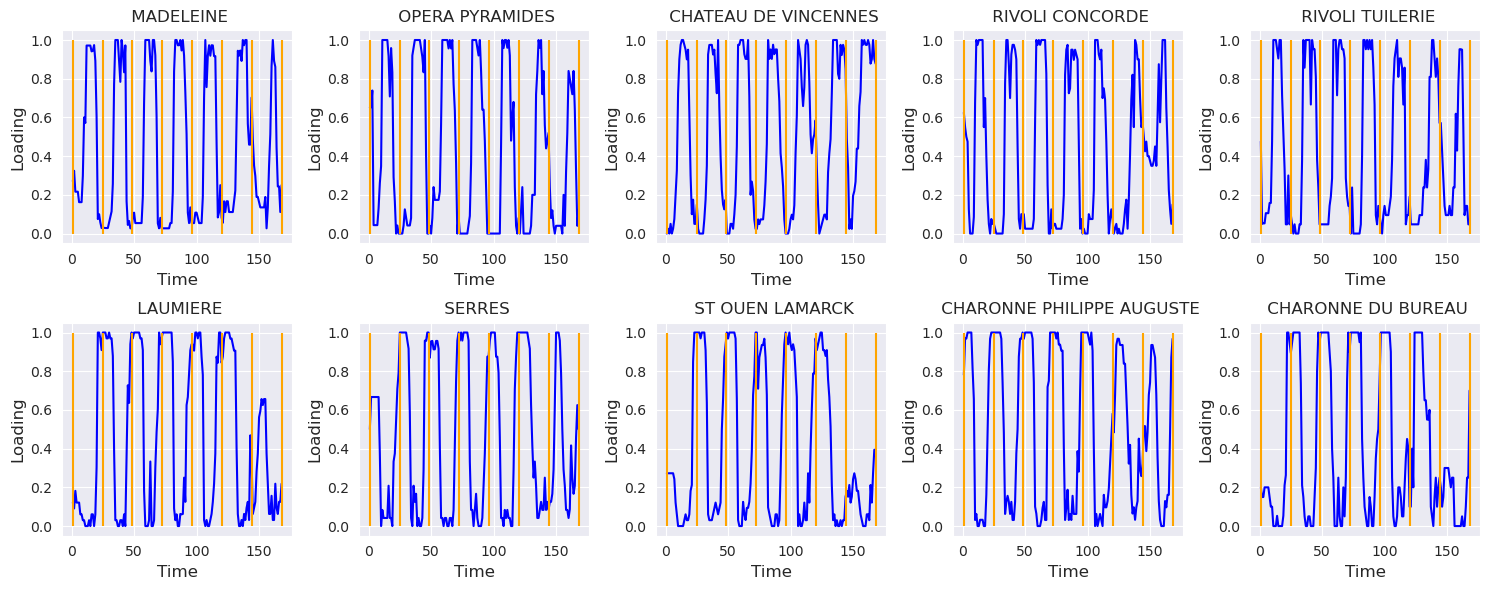

In [25]:
# On affiche l'évolution du chargement des stations correspondant aux indices que nous venons de récupérer

n_steps    = loading.shape[1]  # nombre de pas de temps observés
time_range = np.linspace(1, n_steps, n_steps)  # intervalle de temps observé
time_tick  = np.linspace(1, n_steps, 8)  # début de chaque jour


fig, axs = plt.subplots(2, 5, figsize = (15,6))

for j in range(5):
    k_station = max2[j] # on parcourt les 16 premiers éléments de la liste (de 0 à 15)
    axs[0, j].plot(time_range, loading_data[k_station, :], color = 'blue')
    axs[0, j].vlines(x = time_tick, ymin = 0, ymax = 1, colors = "orange")
    axs[0, j].set_title(coord.names[1 + k_station], fontsize = 12)
    
for j in range(5):
    k_station = min2[j] # on parcourt les 16 premiers éléments de la liste (de 0 à 15)
    axs[1, j].plot(time_range, loading_data[k_station, :], color = 'blue')
    axs[1, j].vlines(x = time_tick, ymin = 0, ymax = 1, colors = "orange")
    axs[1, j].set_title(coord.names[1 + k_station], fontsize = 12)

for ax in axs.flat:
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Loading', fontsize = 12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
plt.tight_layout()
plt.show()

Interprétation : 

De manière analogue à l'analyse de la première composante, nous représentons ici l'évolution des taux de chargements des stations correspondants aux 5 indices max et 5 indices min que nous avons récupéré pour la deuxième composante. 

* On remarque sur la première ligne de graphiques que les pics correspondant aux valeurs maximales des taux de chargements pour chaque station se trouvent aux milieux des journées, alors que les pics les plus bas se trouvent lors des changements de jours (changements de dates). 
* Sur la deuxième ligne de graphiques, les observations sont inversées : les pics maxima se trouvent aux changements des jours et les pics correspondant aux minima sont au milieu de chaque journée. 

On peut supposer ici que la deuxième composante porte de l'information sur les stations qui sont plus remplies le jour que la nuit, et inversement. Une valeur élevée pour la deuxième composante indique que les stations ont un taux de remplissage faible la nuit et élevé la journée. Inversement, une faible valeur pour la deuxième composante pourrait indiquer que les taux de remplissage des stations sont faibles la journée et élevés la nuit. Cette hypoyhèse pourrait être vérifier à l'aide d'une variable présentant la différence de chargement entre le jour et la nuit. Il faudrait alors étudier l'évolution et les corrélations de cette variable. 

### Composante principale 3

Nous réitérons l'analyse avec la troisème composante.

In [26]:
# On récupère les 5 valeurs min et max pour la troisème composante

max3 = loading_pca["Dim3"].nlargest(5).index
print("Indices des valeurs max")
print(max3)
print("")
min3 = loading_pca["Dim3"].nsmallest(5).index
print("Indices des valeurs min")
print(min3)

Indices des valeurs max
Int64Index([1127, 659, 133, 701, 775], dtype='int64')

Indices des valeurs min
Int64Index([750, 1035, 423, 13, 249], dtype='int64')


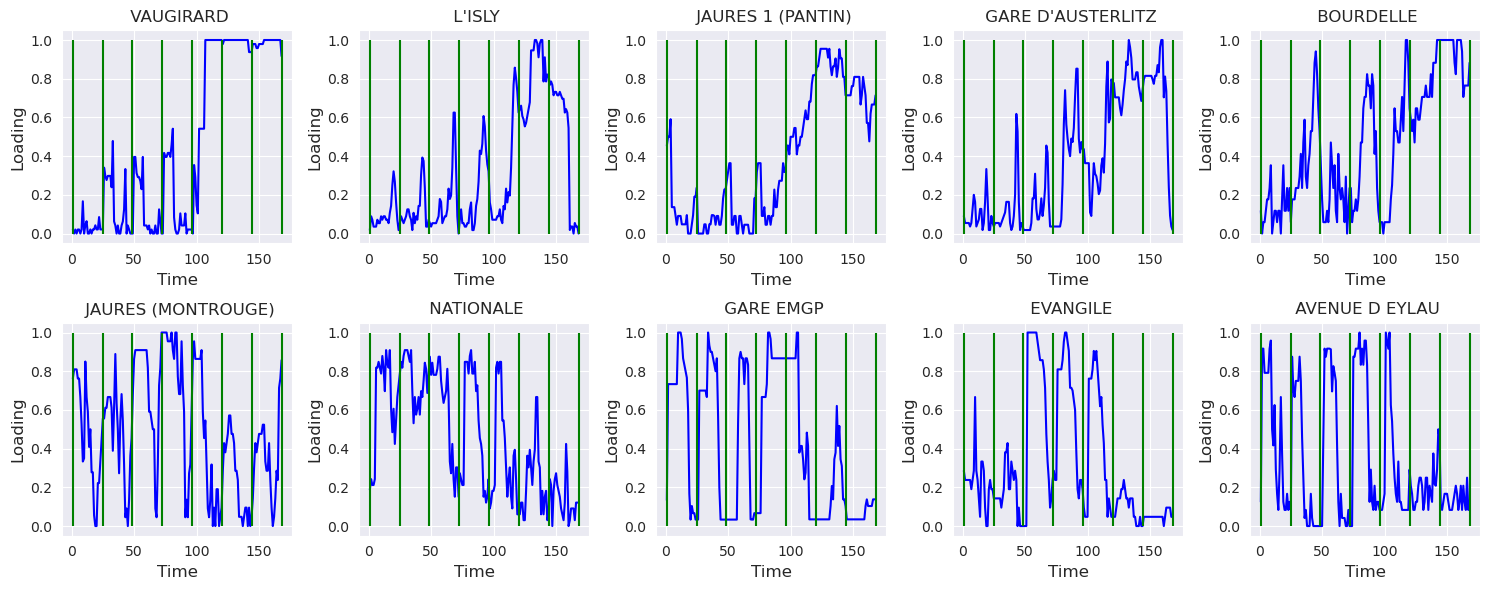

In [27]:
# On affiche l'évolution du chargement des stations correspondant aux indices que nous venons de récupérer

n_steps    = loading.shape[1]  # nombre de pas de temps observés
time_range = np.linspace(1, n_steps, n_steps)  # intervalle de temps observé
time_tick  = np.linspace(1, n_steps, 8)  # début de chaque jour


fig, axs = plt.subplots(2, 5, figsize = (15,6))

for j in range(5):
    k_station = max3[j] # on parcourt les 16 premiers éléments de la liste (de 0 à 15)
    axs[0, j].plot(time_range, loading_data[k_station, :], color = 'blue')
    axs[0, j].vlines(x = time_tick, ymin = 0, ymax = 1, colors = "green")
    axs[0, j].set_title(coord.names[1 + k_station], fontsize = 12)
    
for j in range(5):
    k_station = min3[j] # on parcourt les 16 premiers éléments de la liste (de 0 à 15)
    axs[1, j].plot(time_range, loading_data[k_station, :], color = 'blue')
    axs[1, j].vlines(x = time_tick, ymin = 0, ymax = 1, colors = "green")
    axs[1, j].set_title(coord.names[1 + k_station], fontsize = 12)

for ax in axs.flat:
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Loading', fontsize = 12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
    
plt.tight_layout()
plt.show()

Interprétation : 

Toujours dans la même démarche de celle de l'analyse des deux premières composantes, nous représentons ici l'évolution des taux de chargements des stations correspondants aux 5 indices max et 5 indices min que nous avons récupéré pour la troisième composante. 
* Sur la première ligne, on a représenté les stations correspondant aux indices des 5 valeurs les plus élevées pour la dimension 3. On observe que le taux de chargement des stations sur cette ligne est globalement moyen à faible en semaine et élevé lors des week-ends. 
* Sur la deuxième ligne, on a représenté les stations correspondant aux indices des 5 valeurs les plus faibles pour la dimension 3. On observe que le taux de chargement des stations sur cette ligne est globalement moyen à faible durant les week-ends et élevé en semaines. 

On peut faire la supposition que la troisème composante représente l'alternance entre jours travaillés et week-ends. Une valeur élevée pour la troisème dimension pourrait indiquer que les stations sont assez peu chargées en semaine et pleines durant les week-ends. Inversement, une faible valeur pour la dimension 3 pourrait signifier que les stations présentent de la disponibilité en semaine et sont plus sollicitées lors des week-ends. On pourrait étudier la véracité de cette hypothèse en créant une nouvelle variable et en procédant à une étude, comme présenté pour l'hypothèse sur la deuxième composante. function

### Composante principale 4

Nous réitérons l'analyse avec la quatrième composante.

In [28]:
# On récupère les 5 valeurs min et max pour la quatrième composante

max4 = loading_pca["Dim4"].nlargest(5).index
print("Indices des valeurs max")
print(max4)
print("")
min4 = loading_pca["Dim4"].nsmallest(5).index
print("Indices des valeurs min")
print(min4)

Indices des valeurs max
Int64Index([669, 206, 222, 184, 210], dtype='int64')

Indices des valeurs min
Int64Index([434, 1127, 416, 1097, 844], dtype='int64')


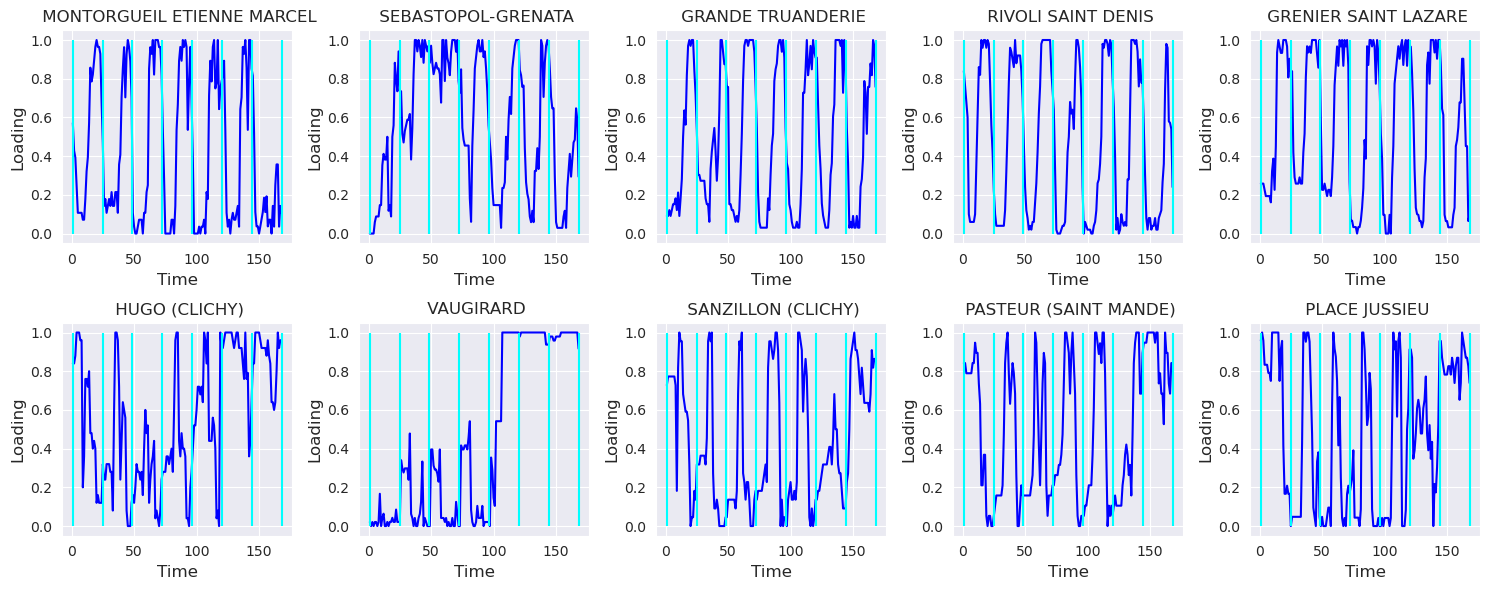

In [29]:
# On affiche l'évolution du chargement des stations correspondant aux indices que nous venons de récupérer

n_steps    = loading.shape[1]  # nombre de pas de temps observés
time_range = np.linspace(1, n_steps, n_steps)  # intervalle de temps observé
time_tick  = np.linspace(1, n_steps, 8)  # début de chaque jour


fig, axs = plt.subplots(2, 5, figsize = (15,6))

for j in range(5):
    k_station = max4[j] # on parcourt les 16 premiers éléments de la liste (de 0 à 15)
    axs[0, j].plot(time_range, loading_data[k_station, :], color = 'blue')
    axs[0, j].vlines(x = time_tick, ymin = 0, ymax = 1, colors = "cyan")
    axs[0, j].set_title(coord.names[1 + k_station], fontsize = 12)
    
for j in range(5):
    k_station = min4[j] # on parcourt les 16 premiers éléments de la liste (de 0 à 15)
    axs[1, j].plot(time_range, loading_data[k_station, :], color = 'blue')
    axs[1, j].vlines(x = time_tick, ymin = 0, ymax = 1, colors = "cyan")
    axs[1, j].set_title(coord.names[1 + k_station], fontsize = 12)

for ax in axs.flat:
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Loading', fontsize = 12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
    
plt.tight_layout()
plt.show()

In [30]:
# On va étudier les noms des stations en altitude, c'est à dire où la valeur dans la colonne 'Bonus' vaut 1

bonus_stations = coord[coord['bonus'] == 1]
print(bonus_stations)

nom_station_recherche = 'VAUGIRARD'

# Remplacez 'nom_colonne' par le nom réel de la colonne qui contient les noms des stations dans votre dataframe
est_present = nom_station_recherche in bonus_stations['bonus'].values

print(est_present)

      longitude   latitude  bonus                          names
11     2.400977  48.867925      1                      PELLEPORT
36     2.296008  48.830269      1                        J DUPRE
46     2.392961  48.875518      1   BELLEVILLE PRE SAINT GERVAIS
59     2.382592  48.875070      1                  SIMON BOLIVAR
85     2.432975  48.868812      1          DE GAULLE (MONTREUIL)
...         ...        ...    ...                            ...
1133   2.403179  48.881770      1             ALEXANDER FLEMMING
1147   2.413240  48.873338      1                   NOISY LE SEC
1153   2.336710  48.806380      1               DOUMER (ARCUEIL)
1169   2.395040  48.869413      1                       PYRENEES
1187   2.314630  48.811102      1    GEORGES MESSIER (MONTROUGE)

[127 rows x 4 columns]
False


/tmp/ipykernel_14945/3183533346.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  est_present = nom_station_recherche in bonus_stations['bonus'].values


Interprétation : 

Nous avons cherché si toutes les stations présentes dans une même ligne du graphique étaient des stations en altitude. Cependant, les stations de la première colonne du graphique se situent en plaine. Cette hypothèse n'est pas possible. De plus, nous avons déjà émis des hypothèses sur le taux de chargement moyen, l'alternance entre le jour et la nuit et l'alternance entre jours travaillés et week-ends. Puisque la quatrième composante principale ne correspond pas forcément au fait qu'une station se trouve ou non en altitude, nous avons étudiés les significations principales possibles des composantes principales. Pour les dimensions supérieures ou égales à 4, il n'est pas forcément possible de trouver une signification correspondant à une caractéristique explicite sur nos données. 

Autre hypothèse possible pour la composante 4 (mais assez peu visible) : la présence de beaucoup de vélos en fin de journée ou pas ? A tester avec des corrélations.En effet, sur la première ligne du graphique, on remarque des pics de taux de chargement important en fin de journée, c'est à dire, proche du trait de séparation entre les jours de la semaine. Sur la deuxième ligne du graphique, ces mêmes pics sont visibles en milieu de journée, c'est à dire, entre deux traits de séparations entre les jours, même si leur intensité peut être plus faible. Pour vérifier cette hypothèse, nous pouvons créer une variable représentant le taux de chargement moyen en fin de journée et une autre en milieu de journée, puis étudier la corrélation avec la dimension 4.peu

### Composante principale 5

In [31]:
# On récupère les 5 valeurs min et max pour la cinquième composante

max5 = loading_pca["Dim5"].nlargest(5).index
print("Indices des valeurs max")
print(max5)
print("")
min5 = loading_pca["Dim5"].nsmallest(5).index
print("Indices des valeurs min")
print(min5)

Indices des valeurs max
Int64Index([1055, 295, 9, 425, 821], dtype='int64')

Indices des valeurs min
Int64Index([349, 430, 495, 780, 565], dtype='int64')


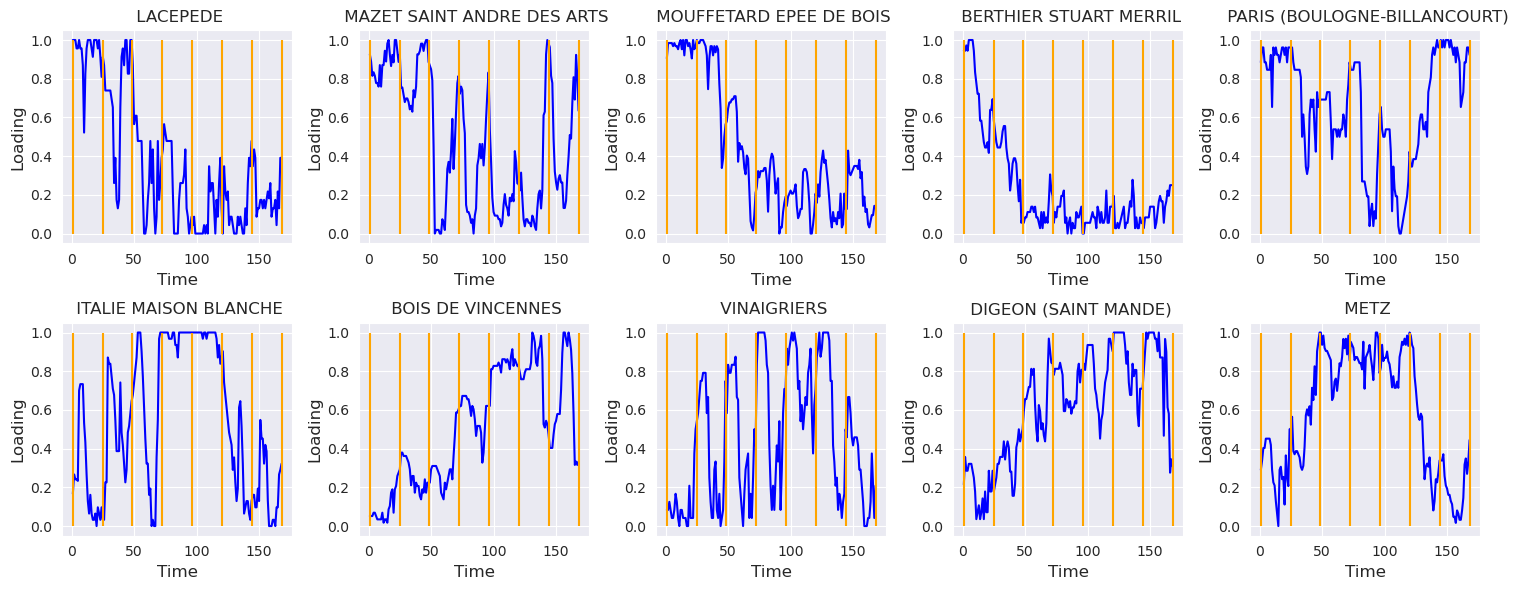

In [32]:
# On affiche l'évolution du chargement des stations correspondant aux indices que nous venons de récupérer

n_steps    = loading.shape[1]  # nombre de pas de temps observés
time_range = np.linspace(1, n_steps, n_steps)  # intervalle de temps observé
time_tick  = np.linspace(1, n_steps, 8)  # début de chaque jour


fig, axs = plt.subplots(2, 5, figsize = (15,6))

for j in range(5):
    k_station = max5[j] # on parcourt les 16 premiers éléments de la liste (de 0 à 15)
    axs[0, j].plot(time_range, loading_data[k_station, :], color = 'blue')
    axs[0, j].vlines(x = time_tick, ymin = 0, ymax = 1, colors = "orange")
    axs[0, j].set_title(coord.names[1 + k_station], fontsize = 12)
    
for j in range(5):
    k_station = min5[j] # on parcourt les 16 premiers éléments de la liste (de 0 à 15)
    axs[1, j].plot(time_range, loading_data[k_station, :], color = 'blue')
    axs[1, j].vlines(x = time_tick, ymin = 0, ymax = 1, colors = "orange")
    axs[1, j].set_title(coord.names[1 + k_station], fontsize = 12)

for ax in axs.flat:
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Loading', fontsize = 12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
    
plt.tight_layout()
plt.show()

Interprétation : 

Sur les 5 premiers graphiques, on remarque que le taux de chargement moyen des stations est plus important en début de semain qu'en fin de semaine,particulièrement les lundis et mardis. A l'inverse, sur les 5 derniers graphiques, les stations sont beaucoup moins chargées, voir vides sur ces mêmes jours. En fin de semaine, on remarque que les 5 premières stations sont beaucoup moins remplies (particulièrement du mercredi au vendredi). A l'inverse, les 5 dernières stations présente un taux de chargement moyen plus élevé sur ces mêmes jours. On peut donc émettre l'hypothèse que la 5ème composante représente l'alternance entre lundi/mardi et mercredi/jeudi/vendredi. 

Il se pourrait que du personnel de gestion des Velib vide certaines stations en cours de semaine et transporte les vélos vers des stations où l'affluence est plus importante enfin de semaine. 

Pour confirmer cette hypothèse, nous allons créer une variable représentant le taux de chargement moyen sur lundi/mardi et une autre sur mercredi/jeudi/vendredi et étudier la corrélation avec la 5ème composante. 

### Composante principale 6

In [33]:
# On récupère les 5 valeurs min et max pour la sixième composante

max6 = loading_pca["Dim6"].nlargest(5).index
print("Indices des valeurs max")
print(max6)
print("")
min6 = loading_pca["Dim6"].nsmallest(5).index
print("Indices des valeurs min")
print(min6)

Indices des valeurs max
Int64Index([40, 1040, 727, 872, 903], dtype='int64')

Indices des valeurs min
Int64Index([337, 1133, 1157, 1187, 566], dtype='int64')


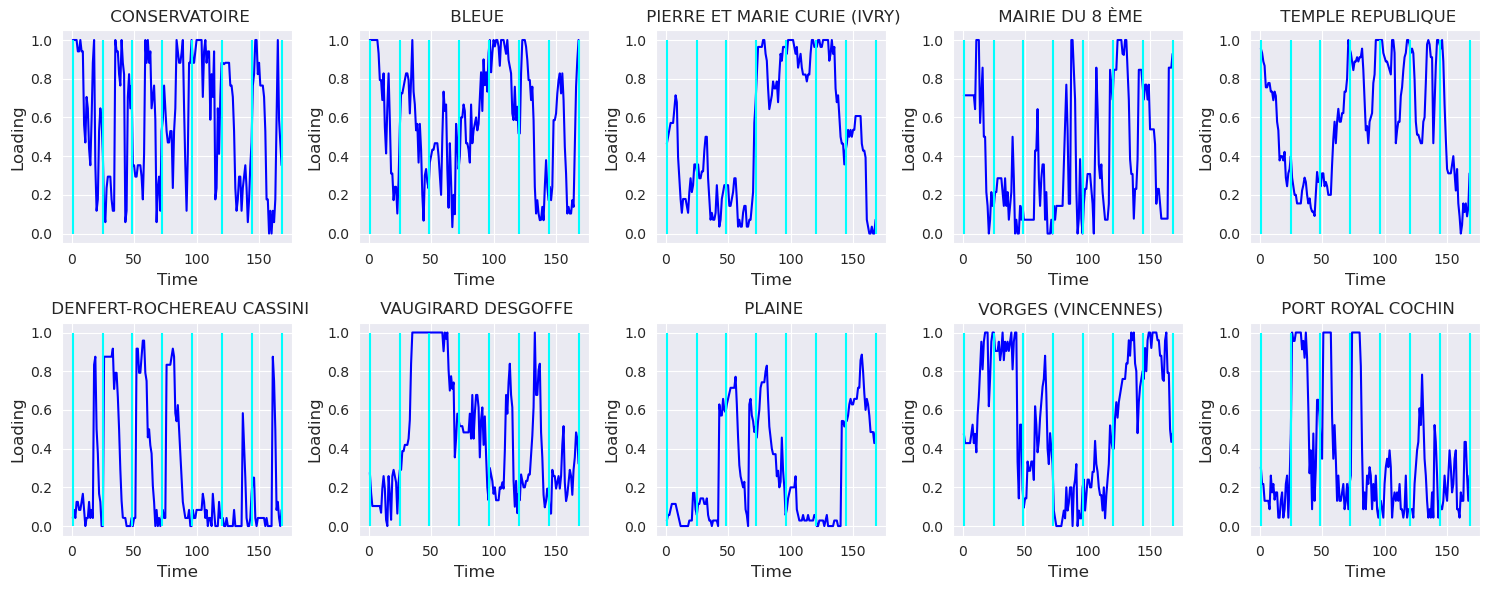

In [34]:
# On affiche l'évolution du chargement des stations correspondant aux indices que nous venons de récupérer

n_steps    = loading.shape[1]  # nombre de pas de temps observés
time_range = np.linspace(1, n_steps, n_steps)  # intervalle de temps observé
time_tick  = np.linspace(1, n_steps, 8)  # début de chaque jour


fig, axs = plt.subplots(2, 5, figsize = (15,6))

for j in range(5):
    k_station = max6[j] # on parcourt les 16 premiers éléments de la liste (de 0 à 15)
    axs[0, j].plot(time_range, loading_data[k_station, :], color = 'blue')
    axs[0, j].vlines(x = time_tick, ymin = 0, ymax = 1, colors = "cyan")
    axs[0, j].set_title(coord.names[1 + k_station], fontsize = 12)
    
for j in range(5):
    k_station = min6[j] # on parcourt les 16 premiers éléments de la liste (de 0 à 15)
    axs[1, j].plot(time_range, loading_data[k_station, :], color = 'blue')
    axs[1, j].vlines(x = time_tick, ymin = 0, ymax = 1, colors = "cyan")
    axs[1, j].set_title(coord.names[1 + k_station], fontsize = 12)

for ax in axs.flat:
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Loading', fontsize = 12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
    
plt.tight_layout()
plt.show()

Interprétation : 

Il n'y a pas de tendance remarquable qui se dégage clairement comme c'était le cas pour les composantes principales. Il pourrait être judicieux de tester si cette composante pourrait représenter l'altitude. Une valeur élevée pourrait signifier une caractéristique vis-à-vis de l'altitude (station en altitude, ou l'inverse). Nous vérifierons cette hypothèse ultérieurement.

### Composante principale 7

In [35]:
# On récupère les 5 valeurs min et max pour la septième composante

max7 = loading_pca["Dim7"].nlargest(5).index
print("Indices des valeurs max")
print(max7)
print("")
min7 = loading_pca["Dim7"].nsmallest(5).index
print("Indices des valeurs min")
print(min7)

Indices des valeurs max
Int64Index([476, 551, 903, 415, 885], dtype='int64')

Indices des valeurs min
Int64Index([833, 213, 17, 438, 806], dtype='int64')


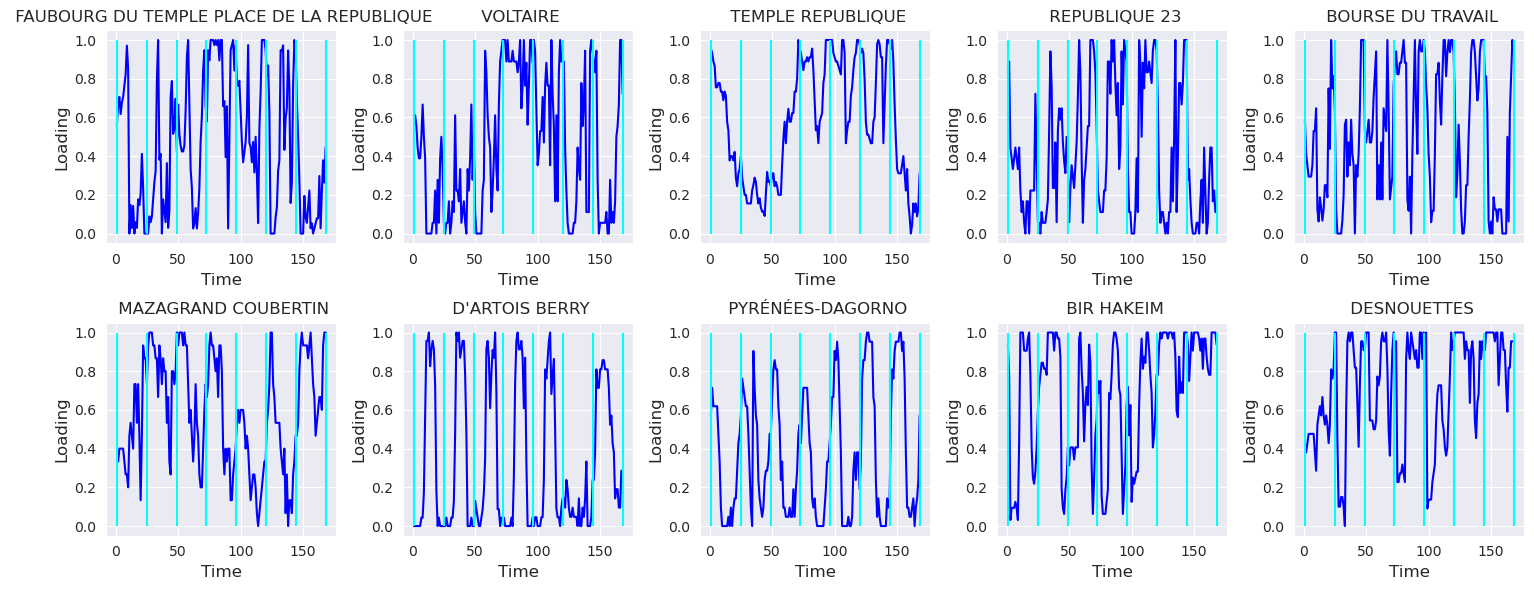

In [36]:
# On affiche l'évolution du chargement des stations correspondant aux indices que nous venons de récupérer

n_steps    = loading.shape[1]  # nombre de pas de temps observés
time_range = np.linspace(1, n_steps, n_steps)  # intervalle de temps observé
time_tick  = np.linspace(1, n_steps, 8)  # début de chaque jour


fig, axs = plt.subplots(2, 5, figsize = (15,6))

for j in range(5):
    k_station = max7[j] # on parcourt les 16 premiers éléments de la liste (de 0 à 15)
    axs[0, j].plot(time_range, loading_data[k_station, :], color = 'blue')
    axs[0, j].vlines(x = time_tick, ymin = 0, ymax = 1, colors = "cyan")
    axs[0, j].set_title(coord.names[1 + k_station], fontsize = 12)
    
for j in range(5):
    k_station = min7[j] # on parcourt les 16 premiers éléments de la liste (de 0 à 15)
    axs[1, j].plot(time_range, loading_data[k_station, :], color = 'blue')
    axs[1, j].vlines(x = time_tick, ymin = 0, ymax = 1, colors = "cyan")
    axs[1, j].set_title(coord.names[1 + k_station], fontsize = 12)

for ax in axs.flat:
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Loading', fontsize = 12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
    
plt.tight_layout()
plt.show()

Interprétation : 

On peut faire la même analyse que pour la sixième composante principale. Il n'y a pas de tendance remarquable qui se dégage clairement comme c'était le cas pour les composantes principales. Il pourrait être judicieux de tester si cette composante pourrait représenter l'altitude. Une valeur élevée pourrait signifier une caractéristique vis-à-vis de l'altitude (station en altitude, ou l'inverse). Nous vérifierons cette hypothèse ultérieurement.

### Test d'un éventuel lien avec altitude

Dans cette sous-partie nous allons tester un éventuel lien avec les dimensions de notre ACP et le caractère 'Bonus' lié à l'altitude.

In [107]:
# On va étudier les noms des stations en altitude, c'est à dire où la valeur dans la colonne 'Bonus' vaut 1

bonus_stations = coord[coord['bonus'] == 1]
#print(coord['bonus'] == 1)
#print(bonus_stations.index)

# On récupère ensuite les valeurs de l'ACP pour les différentes composantes, et calculer les valeurs moyennes pour essayer de voir le lien avec l'altitude

bonus_stations_PCA=loading_pca.iloc[bonus_stations.index,:]

print("Valeur moyenne des stations en altitude sur chaque composante :")
print(bonus_stations_PCA.mean())

Valeur moyenne des stations en altitude sur chaque composante :
Dim1    0.036258
Dim2    0.251761
Dim3   -0.076079
Dim4    0.025384
Dim5    0.045719
Dim6   -0.032873
Dim7   -0.000172
dtype: float64


Interprétation : 

Nous n'observons pas vraiement de lien avec les stations en altitude. Nous n'avons pas de résultat suffisant pour que ce soit une hypothèse importante. Il est possible que les zones en hauteurs soient moins peuplées et regroupent plus des quartiers de bureau/travail.

## Vérification des hypothèses

### Introduction de la méthode

Dans cette partie, nous allons introduire de nouvelles variables découlant des hypothèses sur la signification de nos composantes principales. L'objectif est de tester les corrélations entre les composantes retenues et les nouvelles variables introduites. Ainsi, nous pourrons valider, ou non, nos hypothèses. Pour ce faire, nous allons définir : 
* load_mean : Variable représentant le taux de chargement moyen pour l'hypothèse 1
* diff_jn : Variable représentant la différence de chargement moyen entre le jour et la nuit pour l'hypoyhèse 2
* diff_tw : Variable représentant la différence de chargement moyen entre les jours travaillés et les week-ends pour l'hypoyhèse 3
* diff_ms : Variable représentant la différence de chargement moyen entre le matin et l'après-midi et fin de journée pour l'hypothèse 4 
* diff_df : Variable représentant la différence de chargement moyen entre le début et la fin de la semaine pour l'hypothèse 5

Pour la variable jour/nuit, nous avons utilisé le graphique représentant la superposition de boxplots montrant l'évolution du chargement médian au cours de la semaine. On a étudié les temps marquant une rupture entre les moments du jour et de la nuit. Cette rupture est visible avec des pics plus bas observés sur les troisièmes quantiles des boxplots, et confirmée par les valeurs des médianes. Ainsi, on peut attribuer plage de jour entre 10h et 17h (ce qui cohérent avec les heures de bureau) et une plage de nuit entre 22h à 7h. Entre 18h et 22h, le chargement des stations est plus bas car la mobilité est importante sur ce créneau. Pour la variable matin/soir, nous avons observé de manière similaire un intervalle 6h-11h pour le matin, et 14h-24h pour le soir. Enfin pour la dernière hypothèse sur variable 5 : lundi-mardi contre mercredi-jeudi-vendredi.

In [108]:
# Définition des nouvelles variables
# ---------------------------------

# Chargement moyen 
# ---------------------------------
load_mean = loading.mean(axis=1)

# Différence de chargement moyen entre le jour et la nuit
# ---------------------------------
# nuit : 22h-7h  (ou 21h-7h)  jour : 10h-17h

data_jour=[j+24*i for i in range(7) for j in range(10,18)]
data_nuit=[j+24*i for i in range(7) for j in list(range(8)) + [22,23]]
#print(data_jour)
#print(data_nuit)

diff_jn = loading[loading.columns[data_jour]].mean(axis=1)-loading[loading.columns[data_nuit]].mean(axis=1)
#print(diff_jn)

# Différence de chargement moyen entre les jours travaillés et les week-ends
# ---------------------------------
# weekend : vendredi 20h -> dimanche 20h  semaine : lundi 10h -> vendredi 17h
data_weekend=list(range(4*24+20,6*24+21))
data_week=list(range(10,4*24+18))

diff_tw = loading[loading.columns[data_week]].mean(axis=1)-loading[loading.columns[data_weekend]].mean(axis=1)

# Différence de chargement moyen entre le matin et les fins de journées
# ---------------------------------
# matin : 6h-11h   fin journée : 14h-00h

data_matin=[j+24*i for i in range(7) for j in range(6,11)]
data_soir=[j+24*i for i in range(7) for j in list(range(14,23)) + [0]]

diff_ms = loading[loading.columns[data_matin]].mean(axis=1)-loading[loading.columns[data_soir]].mean(axis=1)

# Différence de chargement moyen entre début et fin de semaine
# ---------------------------------
# début : lundi et mardi    fin : mercredi-vendredi

data_debut=list(range(48))
data_fin=list(range(48,120))

diff_df = loading[loading.columns[data_debut]].mean(axis=1)-loading[loading.columns[data_fin]].mean(axis=1)

Une fois nos variables définies, nous allons afficher, pour chaque variable introduite, la correspondance avec la composante principale associée. Nous espérons pouvoir observer des corrélations. Cela permettrait la validation, ou dans le cas contraire le rejet, de nos hypothèses établies dans la partie précédente.

Avant de calculer les corrélations (plus intéressantes pour prouver les résultats), nous allons afficher nos 3 premières composantes en fonction de la variable créée correspondante, pour observer une éventuelle corrélation à travers des grapiques.

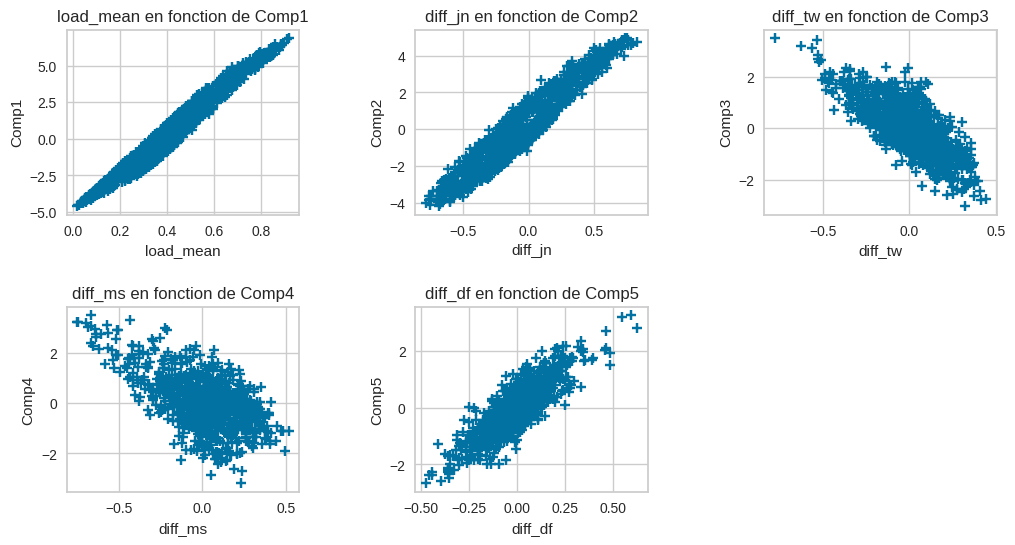

In [113]:
plt.figure(figsize=(12,6))

plt.subplot(231)
plt.scatter(load_mean,loading_pca["Dim1"],marker='+')
plt.title("load_mean en fonction de Comp1")
plt.xlabel('load_mean')
plt.ylabel('Comp1')

plt.subplot(232)
plt.scatter(diff_jn,loading_pca["Dim2"],marker='+')
plt.title("diff_jn en fonction de Comp2")
plt.xlabel('diff_jn')
plt.ylabel('Comp2') 

plt.subplot(233)
plt.scatter(diff_tw,loading_pca["Dim3"],marker='+')
plt.title("diff_tw en fonction de Comp3")
plt.xlabel('diff_tw')
plt.ylabel('Comp3') 

plt.subplot(234)
plt.scatter(diff_ms,loading_pca["Dim4"],marker='+')
plt.title("diff_ms en fonction de Comp4")
plt.xlabel('diff_ms')
plt.ylabel('Comp4') 

plt.subplot(235)
plt.scatter(diff_df,loading_pca["Dim5"],marker='+')
plt.title("diff_df en fonction de Comp5")
plt.xlabel('diff_df')
plt.ylabel('Comp5') 

# Ajuster les marges horizontales entre les subplots
plt.subplots_adjust(wspace=0.5,hspace=0.5)

plt.show()

Interprétation : 

Pour chacune des variables inroduites, on observe une corrélation forte avec la dimension de l'ACP associée, qui se traduit par une tendance linéaire. Cette tendance est évidente pour les 2 premières composantes prinipales et est très marquée pour la troisième composante. De plus, plus la tendance linéaire est fine, plus la corrélation ets importante : c'est le cas pour les deux premières dimensions. On en déduit que chaque variable introduite est fortement corrélée avec la dimension associée. Nos hypothèses précédentes sont validées.

Dimensions 4 et 5 pas super linéaires non plus, mais pas mal quand meme. La composante 4 est la plus "brouillone".

### Etude des corrélations avec les nouvelles variables

On va maintenant calculer les corrélations et faire le graphe. On va d'abord étudier les variables nouvellement crées, puis les jours et les heures de la semaine.

In [40]:
#On va créer un DataFrame panda avec les composantes principales, les 3 variables créées et l'altitude des stations

#On créer le dataframe data1
data1 = pd.concat([load_mean,diff_jn,diff_tw,diff_ms,diff_df,loading_pca["Dim1"].shift(),loading_pca["Dim2"].shift(),loading_pca["Dim3"].shift(),loading_pca["Dim4"].shift(),loading_pca["Dim5"].shift()],axis=1)

#On utilise .shift sur les donénes de loading_pca car les données démarrent à 0, alors que data1 démarre à 1.
data1.columns=["Load mean","Diff jour-nuit","Diff semaine-we","Diff matin-soir","Diff debut-fin semaine","Dim1","Dim2","Dim3","Dim4","Dim5"]
print(data1.head())

#On construit une matrice de corrélation avec des valeurs d'abord

cormat1 = data1.corr()
round(cormat1,2)


   Load mean  Diff jour-nuit  Diff semaine-we  Diff matin-soir  \
1   0.277860       -0.330065         0.064797         0.016020   
2   0.506223       -0.693012        -0.054610         0.165810   
3   0.466758        0.089350        -0.034952        -0.204947   
4   0.434604        0.493424        -0.046685         0.089162   
5   0.529899        0.244339         0.187231        -0.191223   

   Diff debut-fin semaine      Dim1      Dim2      Dim3      Dim4      Dim5  
1               -0.182364 -0.898351 -2.323003  0.458664  1.478543 -0.898677  
2               -0.076389  2.549737 -3.931784  0.242345  1.073338 -0.461774  
3               -0.022371  1.051734  1.056763  0.857191  0.939231 -0.981844  
4                0.246505 -0.083203  3.523981 -0.585202 -2.053468  1.582905  
5                0.139488  1.381803  2.717041 -0.639688  0.940387  0.599746  


Load mean  Diff jour-nuit  Diff semaine-we  \
Load mean                    1.00           -0.11            -0.33   
Diff jour-nuit              -0.11            1.00             0.24   
Diff semaine-we             -0.33            0.24             1.00   
Diff matin-soir             -0.15           -0.57            -0.01   
Diff debut-fin semaine       0.05            0.21             0.03   
Dim1                         0.99           -0.27            -0.41   
Dim2                         0.16            0.95             0.17   
Dim3                        -0.06            0.01            -0.76   
Dim4                         0.00           -0.04             0.46   
Dim5                        -0.01           -0.08             0.01   

                        Diff matin-soir  Diff debut-fin semaine  Dim1  Dim2  \
Load mean                         -0.15                    0.05  0.99  0.16   
Diff jour-nuit                    -0.57                    0.21 -0.27  0.95   
Diff semaine-we                   -0.01                    0.03 -0.41  0.17   
Diff matin-soir                    1.00                   -0.23 -0.07 -0.65   
Diff debut-fin semaine            -0.23                    1.00  0.01  0.27   
Dim1                              -0.07                    0.01  1.00 -0.00   
Dim2                              -0.65                    0.27 -0.00  1.00   
Dim3                              -0.45                    0.02  0.00  0.00   
Dim4                              -0.57                    0.00  0.00  0.00   
Dim5                              -0.09                    0.84 -0.00 -0.00   

                        Dim3  Dim4  Dim5  
Load mean              -0.06  0.00 -0.01  
Diff jour-nuit          0.01 -0.04 -0.08  
Diff semaine-we        -0.76  0.46  0.01  
Diff matin-soir        -0.45 -0.57 -0.09  
Diff debut-fin semaine  0.02  0.00  0.84  
Dim1                    0.00  0.00 -0.00  
Dim2                    0.00  0.00 -0.00  
Dim3                    1.00 -0.00  0.00  
Dim4                   -0.00  1.00  0.00  
Dim5                    0.00  0.00  1.00

On observe bien les corrélations assez importantes qu'on avait observé précedemment : une corrélation très élevée entre Load mean et la Dim1 (0.99 !!), et idem entre diff jour-nuit et la Dim2. On a également une corrélation négative assez importante entre Diff semaine-we et Dim3, qui confirme notre hypothèse.
On remarque également des corrélations de 0 entre les différentes composantes : c'est cohérent avec la construction des composnates qui sont orthogonales entre elles.


<Axes: >

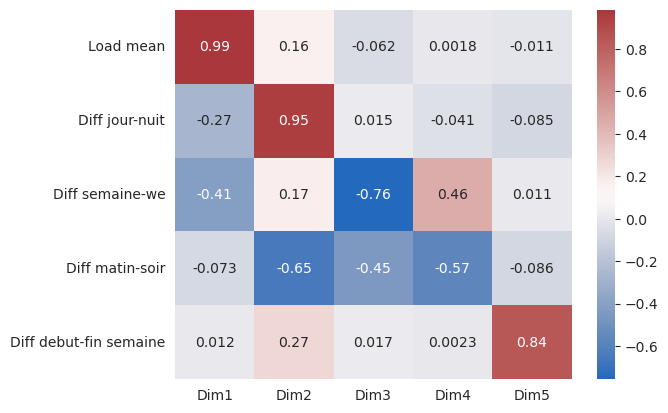

In [41]:
#Affichage en couleur
sns.heatmap(cormat1.iloc[:5,5:10],annot=True,cmap=sns.color_palette("vlag", as_cmap=True))

Interprétation à faire 
- Excellente corrélations pour dim 1 et 2 avec les variables, très élevées également pour dim 3 et 5, un peu plus faible pour dim 4 mais quand même significative. 
- Autres corrélations "élevées" : entre Dim 4 et diff semaine-weekend : peut-être un lien également entre la dim 4 et le chargement le weekend.
- Entre Diff mtin-soir et la dim 2 : logique, car la définition est assez proche de la répartition jour nuit

### Etude des corrélations avec les heures et les jours de la semaine

In [42]:
#On va créer un DataFrame panda avec les composantes principales en fonction des heures et des jours

#On créer le dataframe data1
data2 = pd.concat([loading_pca["Dim1"],loading_pca["Dim2"],loading_pca["Dim3"],loading_pca["Dim4"],loading_pca["Dim5"],loading_pca["Dim6"],loading_pca["Dim7"]],axis=1)

data2.columns=["Dim1","Dim2","Dim3","Dim4","Dim5","Dim6","Dim7"]
for i in range(168):
    data2.insert(i,str(i),loading_data[:,i])
    data2=data2.copy()


#print(data2.head())

#On construit une matrice de corrélation avec les valeurs

cormat2 = data2.corr()
round(cormat2,2)


0     1     2     3     4     5     6     7     8     9  ...   165  \
0     1.00  0.94  0.88  0.86  0.82  0.77  0.77  0.76  0.73  0.57  ...  0.64   
1     0.94  1.00  0.94  0.92  0.87  0.83  0.83  0.81  0.78  0.55  ...  0.60   
2     0.88  0.94  1.00  0.98  0.93  0.89  0.88  0.87  0.82  0.53  ...  0.56   
3     0.86  0.92  0.98  1.00  0.96  0.91  0.90  0.89  0.83  0.52  ...  0.56   
4     0.82  0.87  0.93  0.96  1.00  0.96  0.95  0.94  0.87  0.50  ...  0.53   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
Dim3 -0.05 -0.12 -0.19 -0.20 -0.24 -0.27 -0.27 -0.27 -0.26 -0.24  ...  0.15   
Dim4 -0.05 -0.07 -0.09 -0.11 -0.12 -0.12 -0.12 -0.13 -0.16 -0.20  ... -0.12   
Dim5  0.45  0.47  0.49  0.49  0.49  0.49  0.48  0.47  0.42  0.27  ...  0.20   
Dim6  0.20  0.22  0.23  0.23  0.22  0.21  0.20  0.19  0.15  0.09  ... -0.02   
Dim7  0.10  0.15  0.20  0.20  0.24  0.28  0.29  0.31  0.33  0.17  ...  0.00   

       166   167  Dim1  Dim2  Dim3  Dim4  Dim5  Dim6  Dim7  
0     0.66  0.67  0.74  0.07 -0.05 -0.05  0.45  0.20  0.10  
1     0.63  0.64  0.73  0.00 -0.12 -0.07  0.47  0.22  0.15  
2     0.59  0.61  0.70 -0.06 -0.19 -0.09  0.49  0.23  0.20  
3     0.59  0.61  0.70 -0.09 -0.20 -0.11  0.49  0.23  0.20  
4     0.57  0.59  0.68 -0.12 -0.24 -0.12  0.49  0.22  0.24  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
Dim3  0.13  0.10 -0.00  0.00  1.00 -0.00  0.00  0.00 -0.00  
Dim4 -0.14 -0.18  0.00  0.00 -0.00  1.00 -0.00  0.00  0.00  
Dim5  0.21  0.19 -0.00  0.00  0.00 -0.00  1.00 -0.00 -0.00  
Dim6  0.03  0.05 -0.00  0.00  0.00  0.00 -0.00  1.00 -0.00  
Dim7 -0.03 -0.07 -0.00 -0.00 -0.00  0.00 -0.00 -0.00  1.00  

[175 rows x 175 columns]

Interprétation : pas grand chose à dire, on va d'abord afficher un graph pour y voir plus clair

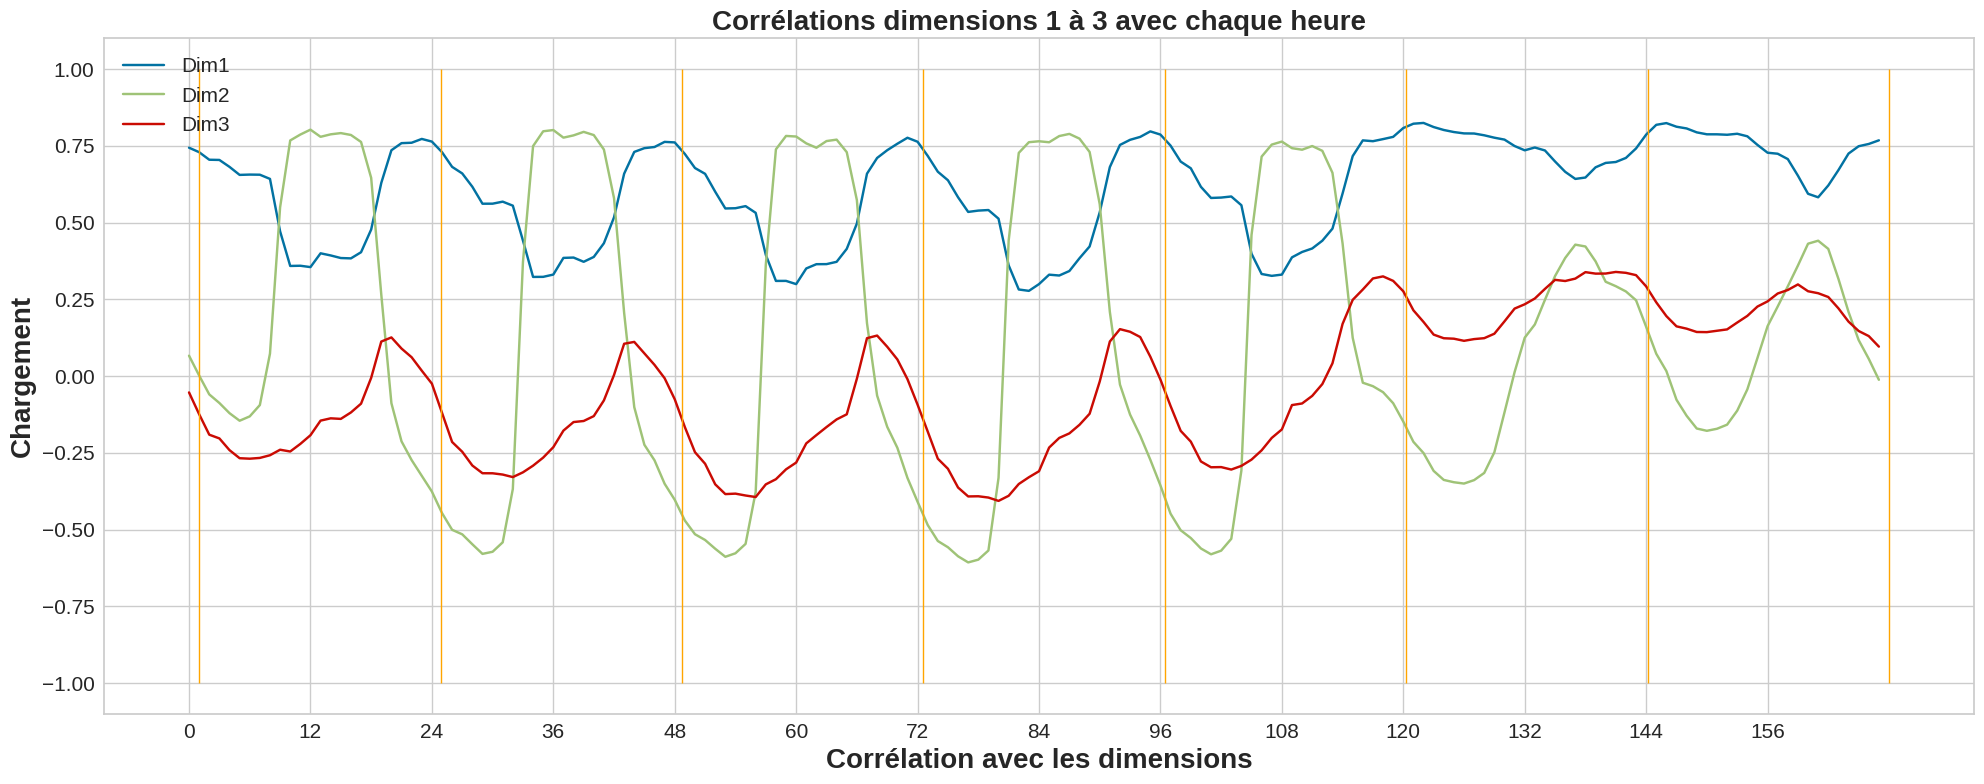

In [104]:
plt.figure(figsize=(20,8))

plt.plot(cormat2['Dim1'].iloc[:168],label="Dim1")
plt.plot(cormat2['Dim2'].iloc[:168],label="Dim2")
plt.plot(cormat2['Dim3'].iloc[:168],label="Dim3")
    
plt.vlines(x = time_tick, ymin = -1, ymax = 1, colors = "Orange", linewidth = 1) 
# time_tick, déjà défini et correspond aux jours

plt.xlabel('Corrélation avec les dimensions', fontsize = 20, fontweight='demibold')
plt.ylabel('Chargement', fontsize = 20, fontweight='demibold')
plt.title("Corrélations dimensions 1 à 3 avec chaque heure", fontsize = 20, fontweight='bold')
plt.xticks(ticks = np.arange(0, 168, 12), labels=np.arange(0, 168, 12), fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

plt.tight_layout()
plt.show()

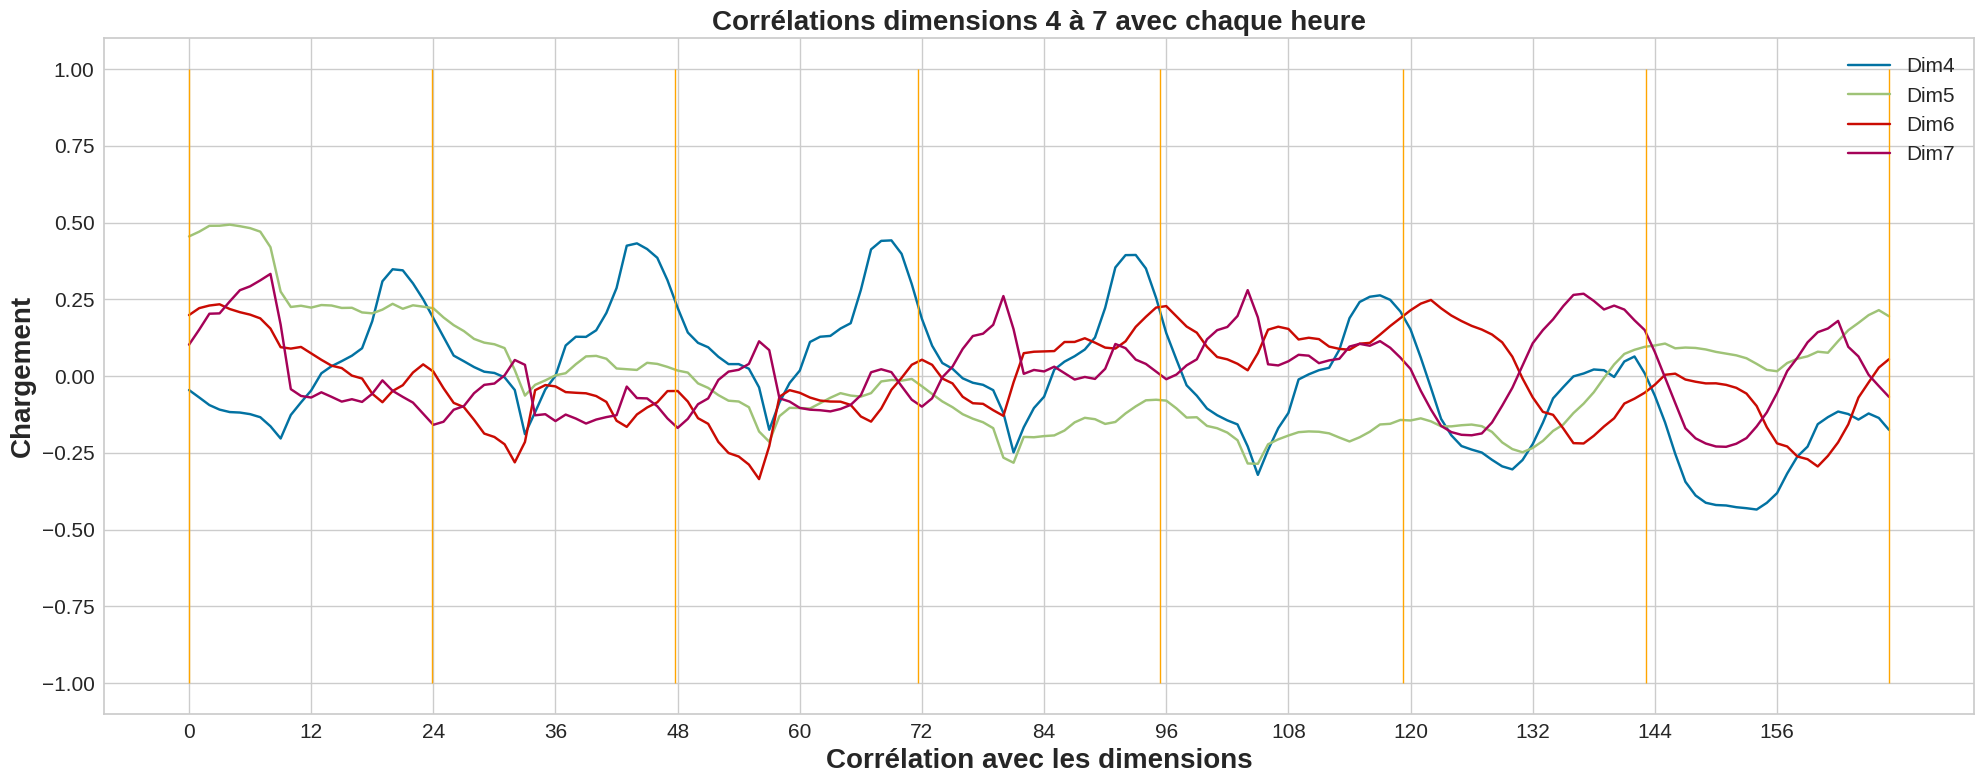

In [103]:
plt.figure(figsize=(20,8))

plt.plot(cormat2['Dim4'].iloc[:168],label="Dim4")
plt.plot(cormat2['Dim5'].iloc[:168],label="Dim5")
plt.plot(cormat2['Dim6'].iloc[:168],label="Dim6")
plt.plot(cormat2['Dim7'].iloc[:168],label="Dim7")
    
plt.vlines(x = time_tick-1, ymin = -1, ymax = 1, colors = "Orange", linewidth = 1) 
# time_tick, déjà défini et correspond aux jours

plt.xlabel('Corrélation avec les dimensions', fontsize = 20, fontweight='demibold')
plt.ylabel('Chargement', fontsize = 20, fontweight='demibold')
plt.title("Corrélations dimensions 4 à 7 avec chaque heure", fontsize = 20, fontweight='bold')
plt.xticks(ticks = np.arange(0, 168, 12), labels=np.arange(0, 168, 12), fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

plt.tight_layout()
plt.show()

On observe : - sur le 1er graph des grosses amplitudes, régulier sur la semaine, qui confirment nos hypothèses
             - sur le 2eme graph : la dimension 4 est assez lisible, correpondant à ce qu'on avait supposé
                                   la dimension 5 est moins lisible, mais on remarque une corrélation positive de samedi soir à mardi midi, et négative de mercredi soir à samedi aprem, ce qui confirme aussi nos hypothèses
                                   les dimensions 6 et 7 sont assez peu lisibles, les corrélations ne sont pas très régulières et leur amplitude est toujours peu marquée (entre -0.25 et 0.25) -> composantes difficilement interprétable
                                   
Si on souhaitait aller encore plus loin, on pourrait utiliser ces deux graphes pour "affiner" nos définitions des variables grâce à des valeurs plus précis sur les heures corrélés positivement et négativement.

# III - Classification

## Classification sur l'ACP

In [83]:
# Importation des packages pour cette partie

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import colors
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import fowlkes_mallows_score

### Détermination du nombre optimal de clusters

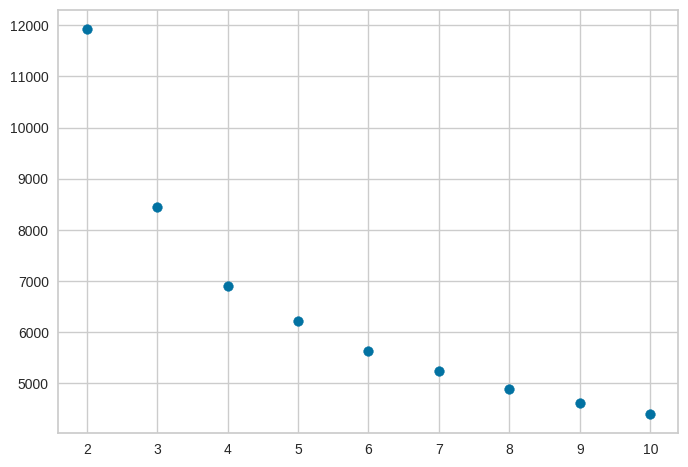

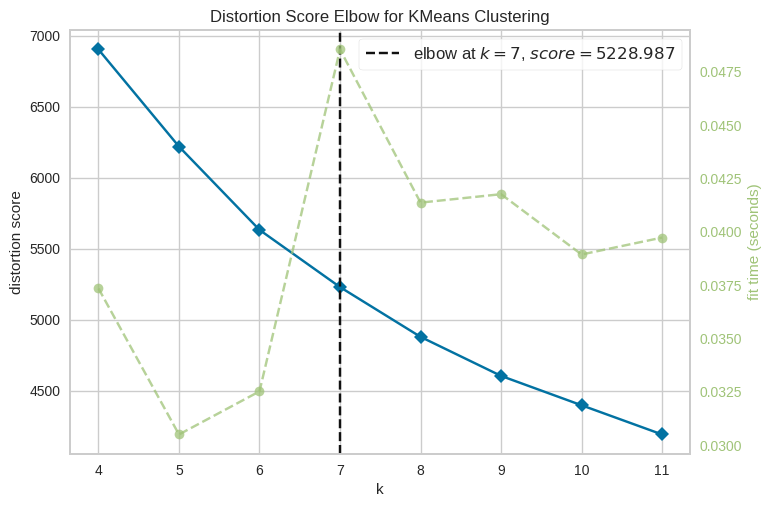

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    kmeans.fit(loading_pca)
    inertia.append(kmeans.inertia_)
inertia = np.array(inertia)

plt.scatter(range(2, 11), inertia[1:])
plt.show()


# Using yellowbrick

kmeans = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(4,12))

visualizer.fit(loading_pca)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

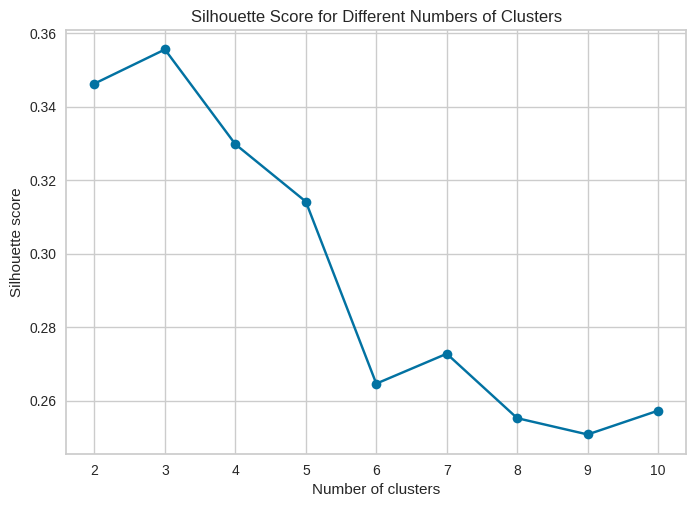

Optimal number of clusters: 3


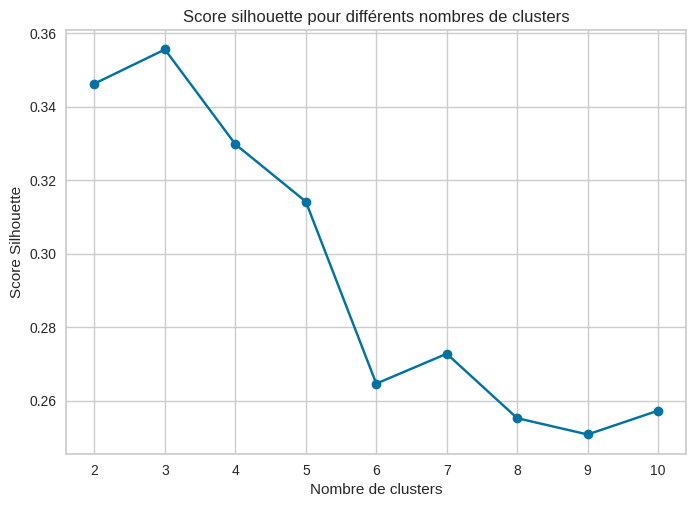

Nombre optimal de clusters d'après le score silhouette : 3


In [47]:
# Liste pour stocker les scores de silhouette
silhouette_scores = []

# Range de nombre de clusters à tester
k_range = range(2, 11)

# Calcul des scores de silhouette pour chaque nombre de clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    cluster_labels = kmeans.fit_predict(loading_pca)
    silhouette_avg = silhouette_score(loading_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Tracer les scores de silhouette en fonction du nombre de clusters
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

# Trouver le nombre optimal de clusters
optimal_num_clusters = k_range[np.argmax(silhouette_scores)]
print("Optimal number of clusters:", optimal_num_clusters)
# Liste pour stocker les scores de silhouette
silhouette_scores = []

# Range de nombre de clusters à tester
k_range = range(2, 11)

# Calcul des scores de silhouette pour chaque nombre de clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    cluster_labels = kmeans.fit_predict(loading_pca)
    silhouette_avg = silhouette_score(loading_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Tracer les scores de silhouette en fonction du nombre de clusters
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score Silhouette')
plt.title('Score silhouette pour différents nombres de clusters')
plt.show()

# Trouver le nombre optimal de clusters
optimal_num_clusters = k_range[np.argmax(silhouette_scores)]
print("Nombre optimal de clusters d'après le score silhouette :", optimal_num_clusters)


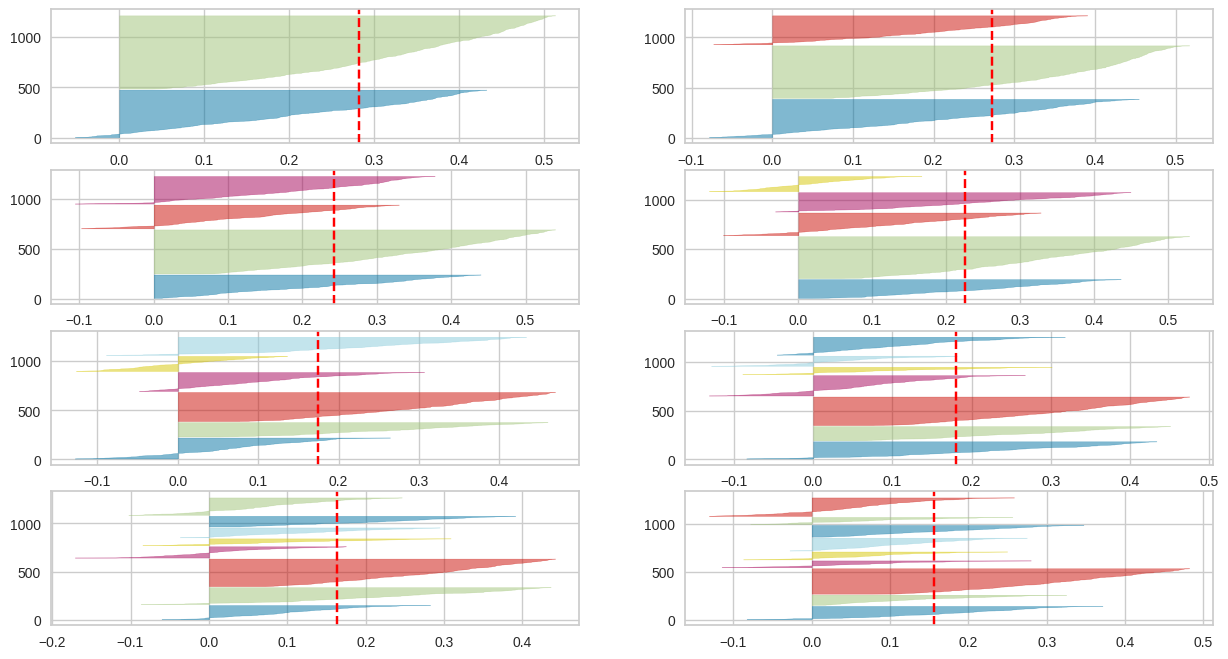

In [48]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))

for k in range(2, 10):
    '''
    Create KMeans instance for different number of clusters
    '''
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(loading)

### K-Means

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


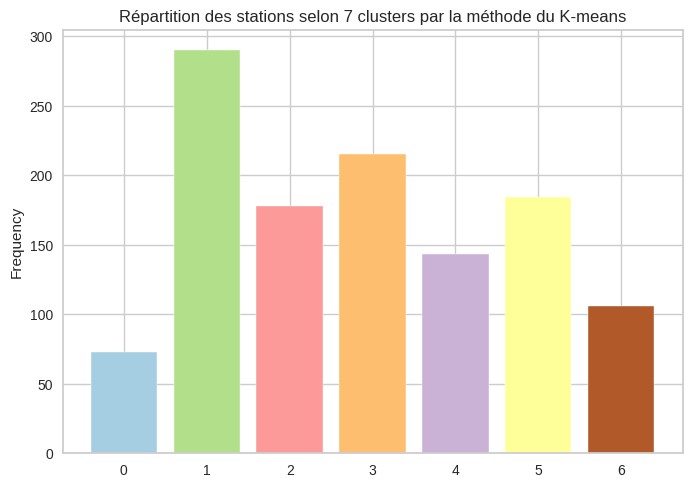

In [49]:
# Classification par K-means avec K clusters
K = 7 # Pris au hasard dans un premier temps

kmeans_pca = KMeans(n_clusters=K, random_state=0)
clusters_pca = kmeans_pca.fit_predict(loading_pca)


cmap = plt.get_cmap('Paired',K)
plt.bar(*np.unique(clusters_pca, return_counts=True), color=cmap.colors)
plt.ylabel("Frequency")
plt.title("Répartition des stations selon "+ str(K)+" clusters par la méthode du K-means")
plt.show()

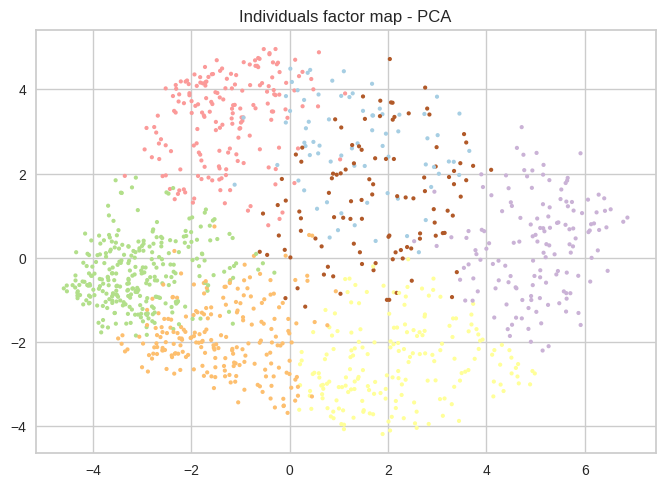

In [50]:
# Visualisation sur le plan factoriel

plt.scatter(loading_pca.values[:, 0], loading_pca.values[:, 1], c=clusters_pca, s=4, linewidths=1, cmap=cmap)

plt.title("Individuals factor map - PCA")

plt.show()

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


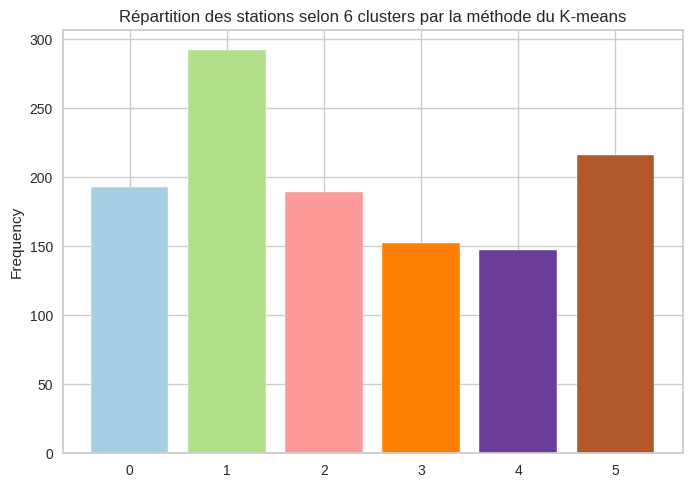

In [51]:
# Classification par K-means avec K clusters
K = 6 # Pris au hasard dans un premier temps

kmeans_pca = KMeans(n_clusters=K, random_state=0)
clusters_pca = kmeans_pca.fit_predict(loading_pca)


cmap = plt.get_cmap('Paired',K)
plt.bar(*np.unique(clusters_pca, return_counts=True), color=cmap.colors)
plt.ylabel("Frequency")
plt.title("Répartition des stations selon "+ str(K)+" clusters par la méthode du K-means")
plt.show()

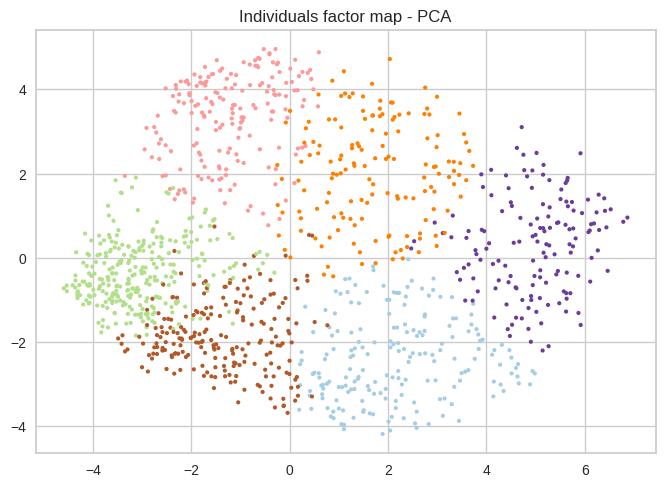

In [52]:
# Visualisation sur le plan factoriel

plt.scatter(loading_pca.values[:, 0], loading_pca.values[:, 1], c=clusters_pca, s=4, linewidths=1, cmap=cmap)

plt.title("Individuals factor map - PCA")

plt.show()

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


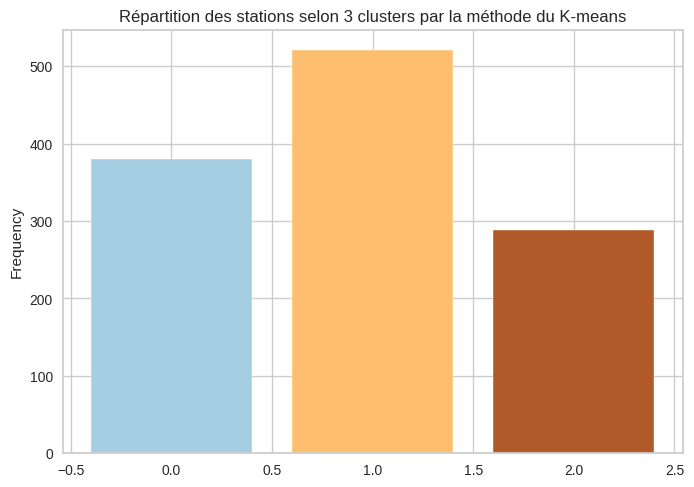

In [53]:
# Classification par K-means avec K clusters
K = 3 # Pris au hasard dans un premier temps

kmeans_pca = KMeans(n_clusters=K, random_state=0)
clusters_pca = kmeans_pca.fit_predict(loading_pca)


cmap = plt.get_cmap('Paired',K)
plt.bar(*np.unique(clusters_pca, return_counts=True), color=cmap.colors)
plt.ylabel("Frequency")
plt.title("Répartition des stations selon "+ str(K)+" clusters par la méthode du K-means")
plt.show()

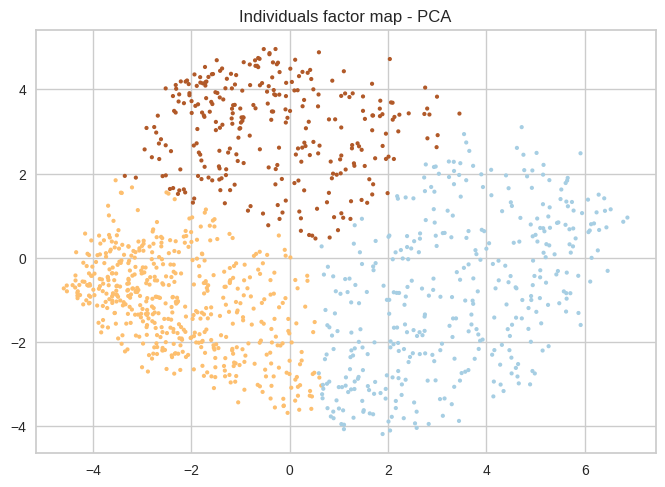

In [54]:
# Visualisation sur le plan factoriel

plt.scatter(loading_pca.values[:, 0], loading_pca.values[:, 1], c=clusters_pca, s=4, linewidths=1, cmap=cmap)

plt.title("Individuals factor map - PCA")

plt.show()

In [55]:
K=6
kmeans_pca = KMeans(n_clusters=K, init='k-means++', n_init=10)
clusters_pca = kmeans_pca.fit_predict(loading_pca)

kmeans_full = KMeans(n_clusters=K, init='k-means++', n_init=10)
clusters_full = kmeans_full.fit_predict(loading)

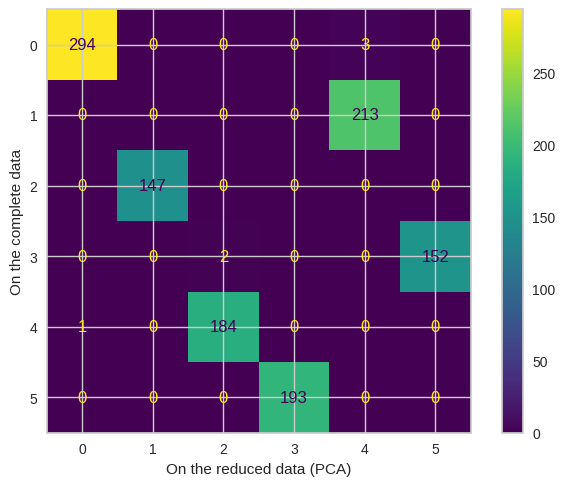

In [56]:
ConfusionMatrixDisplay(confusion_matrix(clusters_full, clusters_pca)).plot()
plt.xlabel('On the reduced data (PCA)')
plt.ylabel('On the complete data')
plt.show()

### GMM

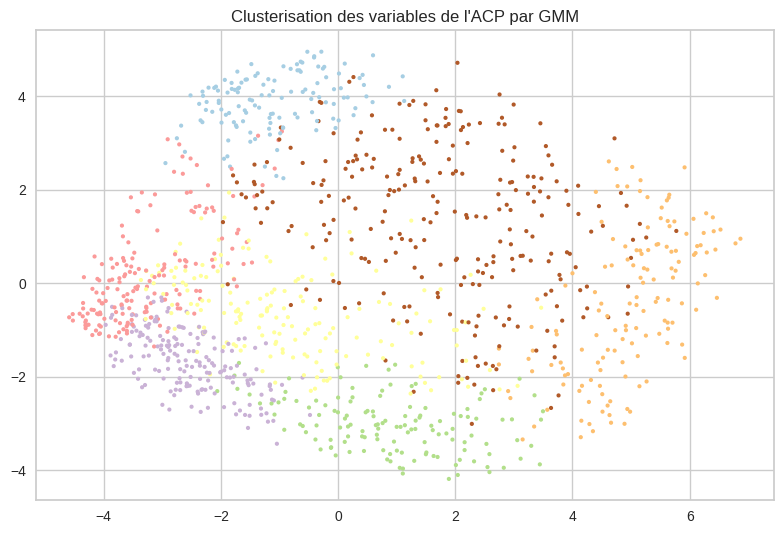

In [79]:
K = 7

cmap = plt.get_cmap('Paired', K)

gmm = GaussianMixture(n_components=K, n_init=3) # n_init = nombre d'initialisations à faire
clusters_gmm = gmm.fit_predict(loading_pca)

plt.scatter(loading_pca.values[:,0], loading_pca.values[:,1], c=clusters_gmm, s=4, linewidths=1, cmap=cmap)

plt.title("Clusterisation des variables de l'ACP par GMM")

plt.tight_layout()
plt.show()

### Comparaison des 2 méthodes

Nous allons comparer les résultats obtenus sur la classification des données de l'ACP. Il est intéressant de comparer les différences entre les nombres de clusters par la méthode deu K-Means, mais aussi cette dernière méthode avec méthode Gaussian Mixture Model (GMM). Pour cela, nous commençons par extraire les étiquettes de chaque clusters, c'est à dire éférence  les identifiants ou au labels attribués à chaque cluster.

In [74]:
# Calcul des étiquettes

kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(loading_pca)
cluster_labels7 = kmeans.labels_ # Etiquettes

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(loading_pca)
cluster_labels6 = kmeans.labels_ # Etiquettes

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(loading_pca)
cluster_labels3 = kmeans.labels_ # Etiquettes


/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Nous commençons par comparer les classifications par K-means selon le critère ARI. L'indice de Rand Ajusté (ARI) est une mesure de similarité entre deux partitionnements de données. Il compare les paires d'échantillons pour voir s'ils sont affectés aux mêmes clusters dans les deux partitionnements, en tenant compte des affectations de cluster par hasard.

In [82]:
# cluster_labels_1 et cluster_labels_2 sont les étiquettes de cluster pour les deux clusterisations
ari = adjusted_rand_score(cluster_labels6, cluster_labels7)
print("ARI entre 6 et 7 clusters :", ari)

ari = adjusted_rand_score(cluster_labels6, cluster_labels3)
print("ARI entre 6 et 3 clusters :", ari)

ari = adjusted_rand_score(cluster_labels7, cluster_labels3)
print("ARI entre 7 et 3 clusters :", ari)


ARI entre 6 et 7 clusters : 0.916772402186878
ARI entre 6 et 3 clusters : 0.495902450836301
ARI entre 7 et 3 clusters : 0.4735066851036107


Interprétation : 
    
L'indice de Rand ajusté (ARI) mesure la similarité entre deux partitions de données, où une valeur de 1 indique une parfaite correspondance entre les partitions et une valeur de 0 indique une correspondance aléatoire. Voici comment interpréter les résultats ARI que vous avez obtenus pour différentes comparaisons entre le nombre de clusters :

* L'ARI entre 6 et 7 clusters (0.916772402186878) est proche de 1. Il indique une très forte similarité entre les partitions de 6 et 7 clusters. Cela suggère que l'ajout d'un cluster n'a pas entraîné de changement significatif dans la structure de clustering.

* L'ARI entre 6 et 3 clusters (0.495902450836301) est proche de 0.5. Il indique une similarité modérée entre les partitions de 6 et 3 clusters. Cela suggère qu'il y a des similitudes dans les groupements de données entre les deux partitions, mais aussi des différences importantes. Il en est de même pour l'ARI entre 7 et 3 clusters, qui vaut 0.4735066851036107.

Ainsi, un ARI plus élevé indique une meilleure similarité entre les partitions de clustering, tandis qu'un ARI plus bas indique une différence plus importante. Dans notre cas, les ARI élevés entre 6 et 7 clusters suggèrent une cohérence dans le choix du nombre de clusters, tandis que les ARI plus bas entre 6 et 3 clusters, ainsi que entre 7 et 3 clusters, montrent des différences marquées entre ces partitions de clustering. Cela pourrait indiquer que le nombre optimal de clusters se situe quelque part entre 6 et 7, mais cela nécessiterait une analyse plus approfondie.

On peut alors étudier d'autres critères de comparaison. Nous allons utiliser l'Indice de Jaccard, qui mesure la similarité entre les partitions en comparant les ensembles d'éléments attribués aux mêmes clusters. dans un second temps, nous utiliserons l'Indice de Fowlkes-Mallows, qui mesure la similarité en comparant à la fois les ensembles d'éléments attribués aux mêmes clusters et les ensembles d'éléments attribués à des clusters différents dans les deux partitions.

In [88]:
jaccard = jaccard_score(cluster_labels6, cluster_labels6, average='micro')
print("Indice de Jaccard sur K-means avec 6 et 7 clusters :", jaccard)

Indice de Jaccard sur K-means avec 6 et 7 clusters : 1.0


In [89]:
jaccard = jaccard_score(cluster_labels3, cluster_labels6, average='micro')
print("Indice de Jaccard sur K-means avec 3 et 6 clusters :", jaccard)

Indice de Jaccard sur K-means avec 3 et 6 clusters : 0.0


In [90]:
jaccard = jaccard_score(cluster_labels3, cluster_labels7, average='micro')
print("Indice de Jaccard sur K-means avec 3 et 7 clusters :", jaccard)

Indice de Jaccard sur K-means avec 3 et 7 clusters : 0.22262210796915166


Interprétation : 

* L'indice de Jaccard entre 6 et 7 clusters vaut 1.0. Un indice de Jaccard de 1.0 signifie que les ensembles de clusters de 6 et 7 clusters sont identiques. Cela suggère une correspondance parfaite entre les deux partitions de clustering, et confirme l'interprétation avec le critère ARI.

* De même , l'indice de Jaccard entre 3 et 6 clusters vaut 0.0. Cela indique qu'il n'y a aucun élément commun entre les ensembles de clusters de 3 et 6 clusters. Les ensembles de clusters sont complètement différents. Cela confirme l'étude avec le critère ARI, et il en est de même pour l'indice de Jacacrd entre 3 et 7 clusters.

Nous allons maintenant utiliser ce même critère pour comparer les modèles GMM et K-means.

In [91]:
jaccard = jaccard_score(clusters_gmm, cluster_labels7, average='micro')
print("Indice de Jaccard sur K-means avec 7 clusters et GMM :", jaccard)

Indice de Jaccard sur K-means avec 7 clusters et GMM : 0.10914179104477612


In [92]:
jaccard = jaccard_score(clusters_gmm, cluster_labels6, average='micro')
print("Indice de Jaccard sur K-means avec 6 clusters et GMM :", jaccard)

Indice de Jaccard sur K-means avec 6 clusters et GMM : 0.04161191414805081


In [94]:
fm = fowlkes_mallows_score(cluster_labels6, clusters_gmm)
print("Indice de Fowlkes-Mallows entre K-Means avec 6 clusters et Gaussian Mixture:", fm)

Indice de Fowlkes-Mallows entre K-Means avec 6 clusters et Gaussian Mixture: 0.47026920255453175


## Classification sur le jeu de données entier

In [60]:
### Détermination du nombre optimal de clusters

In [61]:
### K-Means

In [62]:
### GMM

In [63]:
### Analyse des clusters

In [64]:
## Comparaison des clusters

In [65]:
### Comparaison des méthodes

In [66]:
### Comparaison des espaces d'applications

# IV - Conclusion 